In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**NB//** This was just a practice project for EDA. I did proceed to machine learning, but didn't dwell much on it and definitely made a mistake with train data. My main aim was EDA, which you can definitely appreciate considering the amount of code written. 

While it would be interesting to go in-depth into EDA and figure out how each of the columns relate to each other and to the SalePrice, the aim of this analysis is to create a machine learning model that predicts the SalePrice. Therefore, the EDA is purposed more towards preparing the columns for model fitting. But I have also done some interesting EDAs too.

In [89]:
#loading the data

pd.set_option('display.max_rows', None)
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#drop the Id column
df.drop("Id", axis=1, inplace=True)
print(df.columns.tolist())



['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

# Step 1
Let's start by creating a function that takes in all rows and calculates all the initial analysis we need to better understand the data, such as measures of central tendency.

In [90]:
def central_tendency (df):
    analysis_df =pd.DataFrame(columns = ["count", 'dtype', 'na_values', 'unique', 'mode', 'mean', 'min', '25%', 'median', 
                                     '75%', 'max', 'skewness', 'kurtosis', 'std'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            analysis_df.loc[col] = [df[col].count(), df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].mode().values[0], round(df[col].mean(), 3), df[col].min(), df[col].quantile(0.25), 
                                df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].skew(), df[col].kurtosis(), df[col].std()]
        else:
            analysis_df.loc[col] = [df[col].count(), df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].mode().values[0],'-', '-', '-', '-', 
                                     '-', '-', '-', '-', '-']
    return analysis_df

central_tendency(df).sort_values(by = "dtype")

count    dtype na_values unique       mode         mean  \
MSSubClass     1460    int64         0     15         20     56.89700   
BsmtUnfSF      1460    int64         0    780          0    567.24000   
TotalBsmtSF    1460    int64         0    721          0   1057.42900   
1stFlrSF       1460    int64         0    753        864   1162.62700   
2ndFlrSF       1460    int64         0    417          0    346.99200   
LowQualFinSF   1460    int64         0     24          0      5.84500   
GrLivArea      1460    int64         0    861        864   1515.46400   
BsmtFullBath   1460    int64         0      4          0      0.42500   
BsmtHalfBath   1460    int64         0      3          0      0.05800   
FullBath       1460    int64         0      4          2      1.56500   
HalfBath       1460    int64         0      3          0      0.38300   
BedroomAbvGr   1460    int64         0      8          3      2.86600   
KitchenAbvGr   1460    int64         0      4          1      1.04700   
TotRmsAbvGrd   1460    int64         0     12          6      6.51800   
Fireplaces     1460    int64         0      4          0      0.61300   
GarageCars     1460    int64         0      5          2      1.76700   
GarageArea     1460    int64         0    441          0    472.98000   
WoodDeckSF     1460    int64         0    274          0     94.24500   
OpenPorchSF    1460    int64         0    202          0     46.66000   
EnclosedPorch  1460    int64         0    120          0     21.95400   
3SsnPorch      1460    int64         0     20          0      3.41000   
ScreenPorch    1460    int64         0     76          0     15.06100   
PoolArea       1460    int64         0      8          0      2.75900   
MiscVal        1460    int64         0     21          0     43.48900   
MoSold         1460    int64         0     12          6      6.32200   
YrSold         1460    int64         0      5       2009   2007.81600   
BsmtFinSF2     1460    int64         0    144          0     46.54900   
BsmtFinSF1     1460    int64         0    637          0    443.64000   
SalePrice      1460    int64         0    663     140000 180921.19600   
LotArea        1460    int64         0   1073       7200  10516.82800   
OverallQual    1460    int64         0     10          5      6.09900   
OverallCond    1460    int64         0      9          5      5.57500   
YearBuilt      1460    int64         0    112       2006   1971.26800   
YearRemodAdd   1460    int64         0     61       1950   1984.86600   
LotFrontage    1201  float64       259    110   60.00000     70.05000   
MasVnrArea     1452  float64         8    327    0.00000    103.68500   
GarageYrBlt    1379  float64        81     97 2005.00000   1978.50600   
BsmtQual       1423   object        37      4         TA            -   
GarageFinish   1379   object        81      3        Unf            -   
Neighborhood   1460   object         0     25      NAmes            -   
LandSlope      1460   object         0      3        Gtl            -   
GarageQual     1379   object        81      5         TA            -   
GarageCond     1379   object        81      5         TA            -   
PavedDrive     1460   object         0      3          Y            -   
Utilities      1460   object         0      2     AllPub            -   
LandContour    1460   object         0      4        Lvl            -   
LotShape       1460   object         0      4        Reg            -   
Alley            91   object      1369      2       Grvl            -   
Street         1460   object         0      2       Pave            -   
PoolQC            7   object      1453      3         Gd            -   
Fence           281   object      1179      4      MnPrv            -   
MiscFeature      54   object      1406      4       Shed            -   
MSZoning       1460   object         0      5         RL            -   
SaleType       1460   object         0      9         WD            -   

1. From this, we need to deal with the few columns that have null values.
2. Some of the columns have a skewness greater than 1 meaning we need to standardize these columns when perform further EDA.
3. We might need to set the "Neighborhood" column aside when performing MLR since it has very many categories. Or perform feature engineering on the column 

# Step 2: Dealing with null values

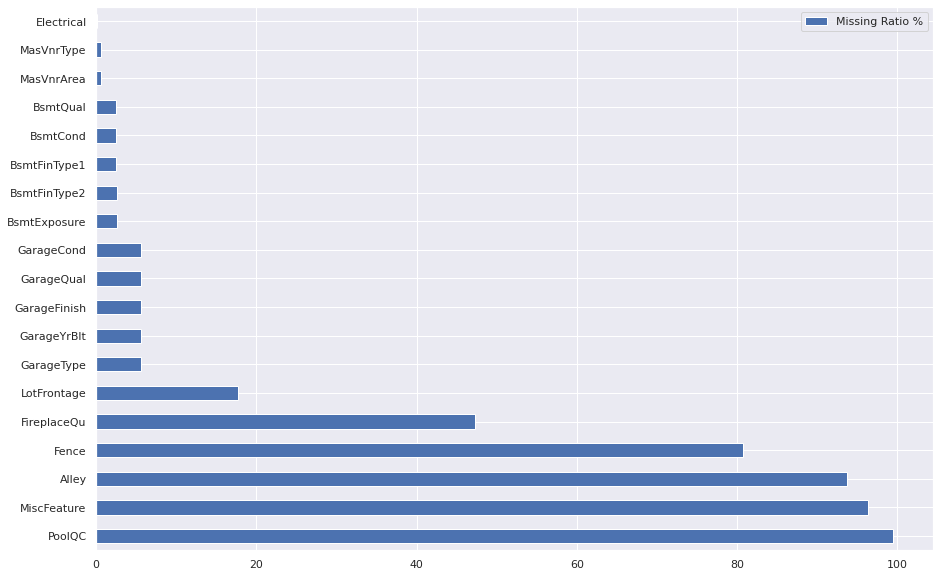

In [91]:
#visualize the distribution of null values

import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plot_width, plot_height = (15,10)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

PoolQC has almost no data, followed by MiscFeature, Alley, Fence, and FireplaceQu. We need a way to impute the missing values in these columns.


In [92]:
#for PoolQC, it is related with the PoolArea, which has no missing values. 
# We can use PoolArea to fill nas in the PoolQC column

print(df.PoolArea.isnull().sum())
poolarea_zero = df[df["PoolArea"] == 0]
print(poolarea_zero.shape[0])
poolqc_missing = df.PoolQC.isnull().sum()
print(poolqc_missing)

df.PoolQC.fillna("NA", inplace=True) #should be treated as a category
df.PoolQC.unique()

0
1453
1453


array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [93]:
#MiscFeature is related to MiscVal column which doesn't also have any missing values. 
#Now that we know how most of the columns with missing values relate,
#let's create a function to ease this process.

def missing_values (df, missing_col, rel_col):
    rel_col_zero = df[df[rel_col] == 0].shape[0]
    missing_vals = df[missing_col].isnull().sum()
    if rel_col_zero == missing_vals:
        df[missing_col].fillna("NA", inplace=True)
        print ('Associated column zero recordings: ' + str(rel_col_zero) + ', ' + ' missing values: ' + str(missing_vals))
        print ('unique values: ', df[missing_col].unique())
    else:
        print ('Associated column zero recordings: ' + str(rel_col_zero) + ', ' + ' missing values: ' + str(missing_vals))
        print ("columns calculations not equal")
        

In [94]:
#solve missing values for MiscFeature
missing_values (df, "MiscFeature", "MiscVal")
df.drop(columns="MiscFeature", inplace = True) # no visible relationship and few values to estimate with. Needs to be dropped

#Alley column
df.drop(columns="Alley", inplace=True) #no relation with other columns and very few variables to fill with using either median or mean. It would make the feature extremely biased.

#Fence column
df.drop(columns="Fence", inplace=True) #there are 1179 missing values and no other column to help in filling Na's. Best option is to drop

#Fireplace column
missing_values(df, "FireplaceQu", "Fireplaces") #missing values equal to 0 Fireplaces in the Fireplaces column

#LotFrontage column
#this can be solved with the median
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

Associated column zero recordings: 1408,  missing values: 1406
columns calculations not equal
Associated column zero recordings: 690,  missing values: 690
unique values:  ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [95]:
#solving the #"GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond" 
# they all have 81 missing values and in the same rows

#create a function for filling garage columns so we can use the same to fill nas in the test dataframe
def garage (df):
    garage_missing = df[(df["GarageType"].isnull()) & (df["GarageYrBlt"].isnull()) & (df["GarageFinish"].isnull()) & (df["GarageQual"].isnull()) & (df["GarageCond"].isnull())]
    missing = garage_missing[["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]
    print (missing)

    #Based on the information provided in Kaggle, these missing values represent houses with no garages. 
    #We need to fill them with a represnetative term such as 'missing'.
    columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
    for col in columns:
        df[col].fillna(value='Missing', inplace=True)
garage(df)

     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
99          NaN          NaN          NaN        NaN        NaN
108         NaN          NaN          NaN        NaN        NaN
125         NaN          NaN          NaN        NaN        NaN
127         NaN          NaN          NaN        NaN        NaN
140         NaN          NaN          NaN        NaN        NaN
148         NaN          NaN          NaN        NaN        NaN
155         NaN          NaN          NaN        NaN        NaN
163         NaN          NaN          NaN        NaN        NaN
165         NaN          NaN          NaN        NaN        NaN
198         NaN          NaN          Na

* We can't deal with 'GarageYrBlt' the same way we dealt with the other categorical columns.
* Well, since dropping it is not an option, we need to find a way to fill the missing values.
* A good place to start is to check relationship between GarageYrBlt and YearBuilt (the year the house was built)


In [96]:
#Checking number of houses with garage built in same year they were built
garage_same_year_as_house = df[df.YearBuilt == df.GarageYrBlt]

print("number of instances where year built == garage year built: ", len(garage_same_year_as_house))
print('total number of rows in original train dataframe; ', len(df))
# out of 1460 houses, 1170 of them have garages built in same year as the house. 
#Fill missing years with year the house was built
df["GarageYrBlt"].fillna(df["YearBuilt"], inplace=True)

number of instances where year built == garage year built:  1089
total number of rows in original train dataframe;  1460


In the case of **'GarageYrBlt'**, out of the **1460** total houses, **1089** of them had garages built the same year as the house. 
We can, therefore, fill missing values in the 'GarageYrBlt' using the year the house was built. However, we can further increase the accuracy by checking the proportion of houses that have garages built in later years based on when the house was built. But I'll stick with just the simple method of directly filling from the year that house was built.

****Filling missing values in the basement columns****

In [97]:
#create a function
#print number of missing values
def basement(df):
    cols = ['BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2']
    for col in cols:
        na = df[col].isnull().sum()
        print(f"{col} missing values: ", na)
            # the missing values represent houses with no basement.
        df[col].fillna(value="Missing_B", inplace=True)
        
basement(df)

BsmtFinType1 missing values:  37
BsmtCond missing values:  37
BsmtQual missing values:  37
BsmtExposure missing values:  38
BsmtFinType2 missing values:  38


****Filling missing values for 'MasVnrType' and 'MsVnrArea'****
* They both have same number of missing values.
* I was torn between using the median for the Area and mode for Type or whether I should use the mode in the type column and then find the median of the modal category to fill the area column. This can be used both ways also. 
* But since there are only 8 missing values, I'll go with the simplest option which is mode and median.


In [98]:
print(df.MasVnrType.value_counts())
print ()
print(df[["MasVnrType", "MasVnrArea"]].isnull().sum())

#fill the category column with the most modal class
df.MasVnrType.fillna(df.MasVnrType.mode()[0], inplace=True)

#fill the Area column with the most median
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace=True)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

MasVnrType    8
MasVnrArea    8
dtype: int64


**Filling Na in Electrical column**

In [99]:
#check number of missing values
print('missing values: ', df.Electrical.isnull().sum())

#fill with modal class
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)

#make a copy of this dataframe to use in modelling
df_copy = df.copy()

missing values:  1


# Step 3. Check for bivariate relationship between the columns and salesprice

let's start by creating functions for calculating anova, and bivariate relationships for continuous data.

**Important note.** THESE ARE NOT MY FUNCTIONS. I got these functions from a YouTube Channel **Mark Keith** while I was learning EDA. He has the best lessons you can find online and definitely recommend you visiting his channel https://www.youtube.com/c/MarkKeith.

In [100]:
#define a function to calculate anova
def anova(df, feature, label):
    import numpy as np #imported earlier, but I kept since I intend to use this function in future
    from scipy import stats
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)

In [101]:
#bivariate relationship for numerical features

def bivariate_stats(df, label):
    from scipy import stats
    import pandas as pd
    #create an empty dataframe to store the results
    corr_df = pd.DataFrame(columns = ["stat", "+/-", "effect size", "p_value"])


    #create a function that loops through the numerical columns and calculates pearson correlation
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            r, p = stats.pearsonr(df.SalePrice, df[col])
            corr_df.loc[col] = ['r', np.sign(r), abs(round(r, 4)), round(p, 4)]

        else:
            F, p = anova(df[[col, label]], col, label)
            corr_df.loc[col] = ['F', '', round(F, 4), round(p, 4)] 
   
    return corr_df.sort_values(by=["effect size", "stat"], ascending=[False, False])
   
bivariate_stats(df, 'SalePrice')

stat      +/-  effect size  p_value
ExterQual        F             443.33480  0.00000
KitchenQual      F             407.80640  0.00000
BsmtQual         F             316.14860  0.00000
GarageFinish     F             213.86700  0.00000
FireplaceQu      F             121.07510  0.00000
MasVnrType       F             108.91130  0.00000
Foundation       F             100.25390  0.00000
CentralAir       F              98.30530  0.00000
HeatingQC        F              88.39450  0.00000
GarageType       F              80.38000  0.00000
Neighborhood     F              71.78490  0.00000
BsmtFinType1     F              64.68820  0.00000
BsmtExposure     F              63.93980  0.00000
SaleCondition    F              45.57840  0.00000
MSZoning         F              43.84030  0.00000
PavedDrive       F              42.02420  0.00000
LotShape         F              40.13290  0.00000
SaleType         F              28.86310  0.00000
GarageQual       F              25.77610  0.00000
GarageCond       F              25.75020  0.00000
Electrical       F              23.07440  0.00000
BsmtCond         F              19.70810  0.00000
HouseStyle       F              19.59500  0.00000
Exterior1st      F              18.61170  0.00000
RoofStyle        F              17.80550  0.00000
Exterior2nd      F              17.50080  0.00000
BldgType         F              13.01110  0.00000
LandContour      F              12.85020  0.00000
PoolQC           F              10.50990  0.00000
ExterCond        F               8.79870  0.00000
LotConfig        F               7.81000  0.00000
BsmtFinType2     F               7.56540  0.00000
RoofMatl         F               6.72730  0.00000
Condition1       F               6.11800  0.00000
Heating          F               4.25980  0.00080
Functional       F               4.05790  0.00050
Street           F               2.45930  0.11700
Condition2       F               2.07390  0.04340
LandSlope        F               1.95880  0.14140
SalePrice        r  1.00000      1.00000  0.00000
OverallQual      r  1.00000      0.79100  0.00000
GrLivArea        r  1.00000      0.70860  0.00000
GarageCars       r  1.00000      0.64040  0.00000
GarageArea       r  1.00000      0.62340  0.00000
TotalBsmtSF      r  1.00000      0.61360  0.00000
1stFlrSF         r  1.00000      0.60590  0.00000
FullBath         r  1.00000      0.56070  0.00000
TotRmsAbvGrd     r  1.00000      0.53370  0.00000
YearBuilt        r  1.00000      0.52290  0.00000
GarageYrBlt      r  1.00000      0.50800  0.00000
YearRemodAdd     r  1.00000      0.50710  0.00000
MasVnrArea       r  1.00000      0.47260  0.00000
Fireplaces       r  1.00000      0.46690  0.00000
BsmtFinSF1       r  1.00000      0.38640  0.00000
LotFrontage      r  1.00000      0.33480  0.00000
WoodDeckSF       r  1.00000      0.32440  0.00000
2ndFlrSF         r  1.00000      0.31930  0.00000
OpenPorchSF      r  1.00000      0.31590  0.00000
Utilities        F               0.29880  0.58470
HalfBath         r  1.00000      0.28410  0.00000
LotArea          r  1.00000      0.26380  0.00000
BsmtFullBath     r  1.00000      0.22710  0.00000
BsmtUnfSF        r  1.00000      0.21450  0.00000
BedroomAbvGr     r  1.00000      0.16820  0.00000
KitchenAbvGr     r -1.00000      0.13590  0.00000
EnclosedPorch    r -1.00000      0.12860  0.00000
ScreenPorch      r  1.00000      0.11140  0.00000
PoolArea         r  1.00000      0.09240  0.00040
MSSubClass       r -1.00000      0.08430  0.00130
OverallCond      r -1.00000      0.07790  0.00290
MoSold           r  1.00000      0.04640  0.07610
3SsnPorch        r  1.00000      0.04460  0.08860
YrSold           r -1.00000      0.02890  0.26940
LowQualFinSF     r -1.00000      0.02560  0.32820
MiscVal          r -1.00000      0.02120  0.41850
BsmtHalfBath     r -1.00000      0.01680  0.52020
BsmtFinSF2       r -1.00000      0.01140  0.66400

The output shows the correlation between individual features and the SalePrice in an ascending order. However, this is not conclusive since it ignores the effect of multicolinearity.
To better understand these bivariate relationships, it's better to make plots. The plots will help us keep track of the correlation, skewness, and homoscedasticity. 

It is evident we need to scale the data to get rid of skewness, kurtosis, and probably heteroscedasticity by using the log of label column.

In [102]:
#calculate homoskedasticity
def homoscedasticity(df, feature, label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    from statsmodels.formula.api import ols

    model = ols(formula = (feature + '~' + label), data=df).fit()
    white_test = het_white(model.resid, model.model.exog)
    breusch = het_breuschpagan(model.resid, model.model.exog)
    results_df = pd.DataFrame(columns = ['LM stat', 'LM p_value', 'F_stat', 'F p_value'])
    results_df.loc['white'] = white_test
    results_df.loc['breus'] = breusch
    
    return results_df.round(3)

In [103]:
#create scatterplots for numerical features vs Saleprice
def scatter(feature, label):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats   
    
    #calculate the regression line
    m, b, r, p, err = stats.linregress(feature, label)
                
    #adding regression results to the plots as text
    textstr = 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
    textstr += 'p = ' + str(round(p, 4)) + '\n'
    textstr += str(feature.name) + ' skew = ' + str(round(feature.skew(), 3)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(), 3)) + '\n'
    textstr += str(homoscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
                
    sns.set(color_codes=True)
    ax = sns.jointplot(x = feature, y = label, data = df, kind="reg")
    ax.fig.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()
    
#change the name of columns with digits as part of title
for col in df:
    if col[0].isdigit():
        numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
        df.rename(columns = {col:numbers[int(col[0])] + '_' + col}, inplace=True)
    

   

In [104]:
#Create bar plot visualization for the categorical variables and check F-stat

def bar_chat(df, feature, label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy import stats
    #grab the unique values of the categorical features
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])

    #calculating anova results
    oneway = stats.f_oneway(*group_labels)
    
    #calculating t_tests with benferroni correction for p_value thresholds
    unique_groups = df[feature].unique()
    ttests = []
    
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                t, p = stats.ttest_ind(type_1[label], type_2[label])
                ttests.append([group, group_2, t.round(4), p.round(4)])
                
    p_threshold = 0.05/len(ttests) #benferroni corrected p_value
    
    #adding results as text to the plots
    
    textstr = '     anova' +  '\n'
    textstr += 'F' + str(oneway[0].round(2)) + '\n'
    textstr += 'P-value' + str(oneway[1].round(2)) + '\n\n'
    textstr += 'Sig.comparisons (Benferroni corrected)' + '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            textstr += ttest[0] + '-' + ttest[1] + ': t=' + str(ttest[2]) + ', p=' + str(ttest[3]) + '\n'
        
    ax = sns.barplot(df[feature], df[label])
    ax.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure) 
    plt.show()

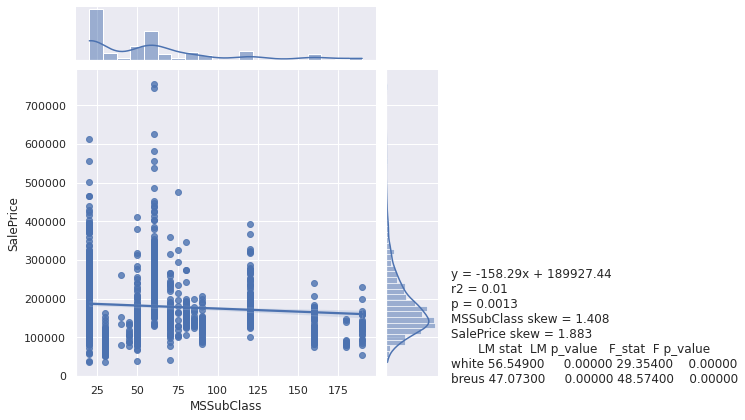

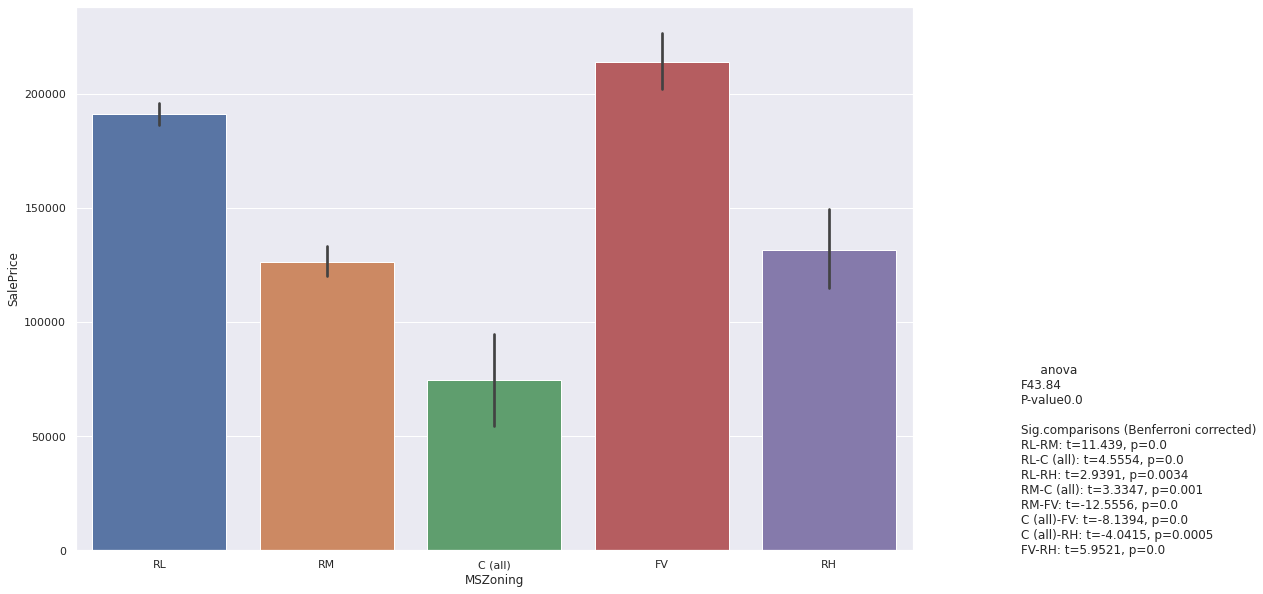

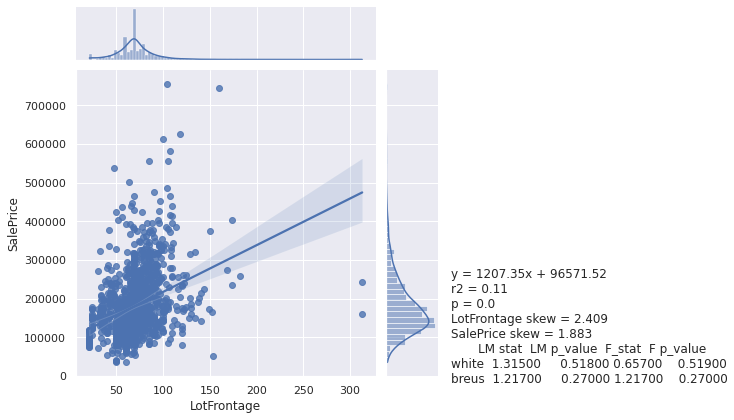

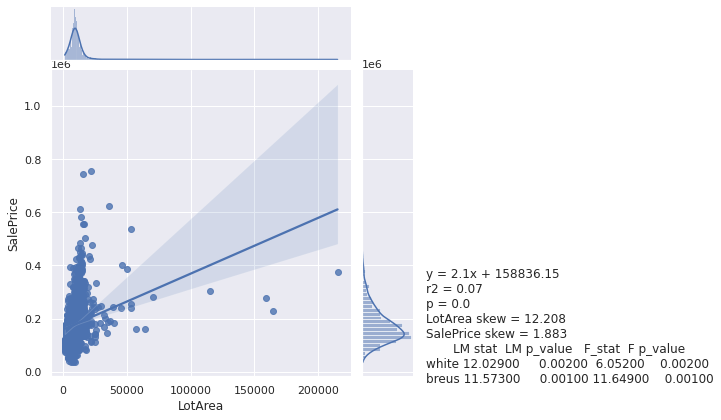

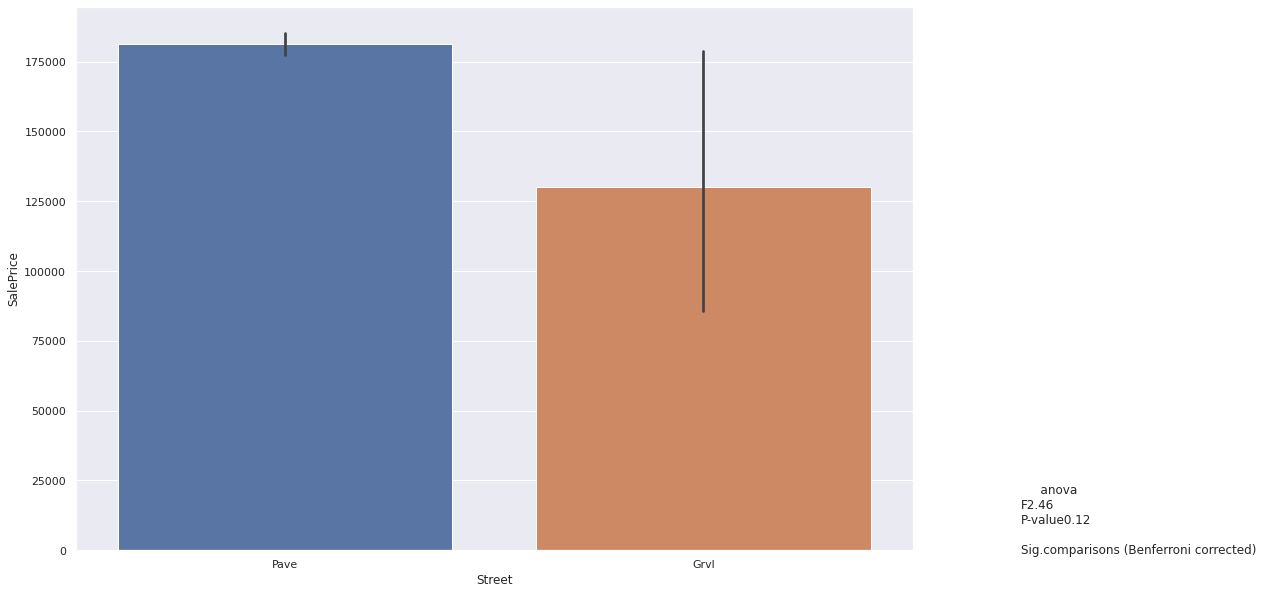

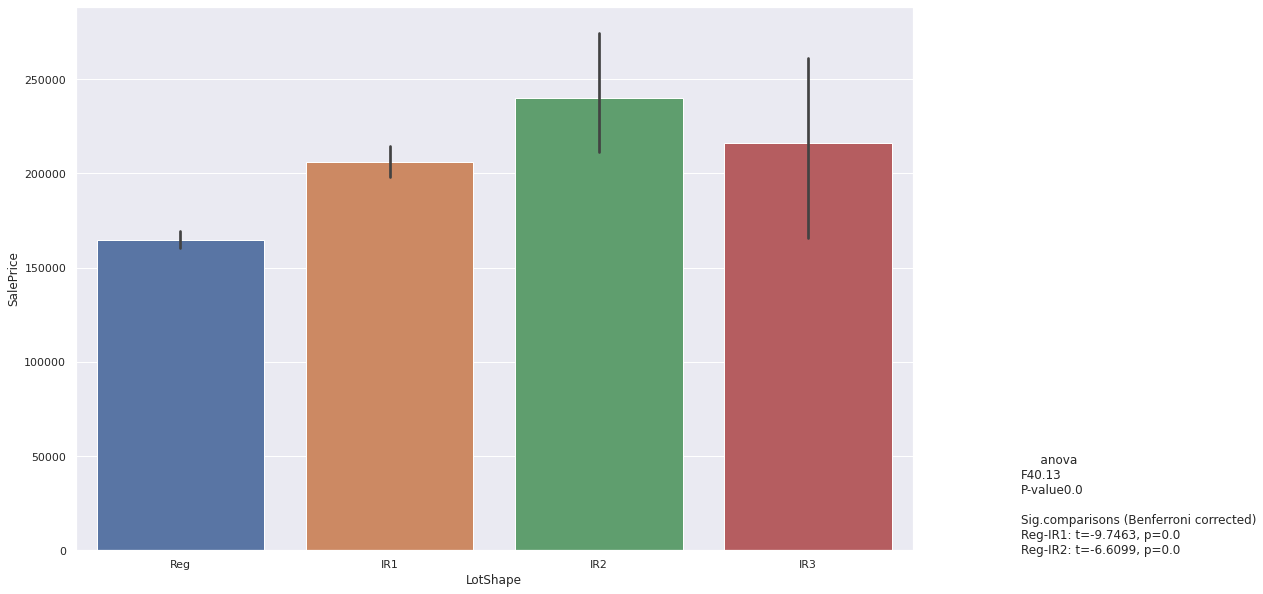

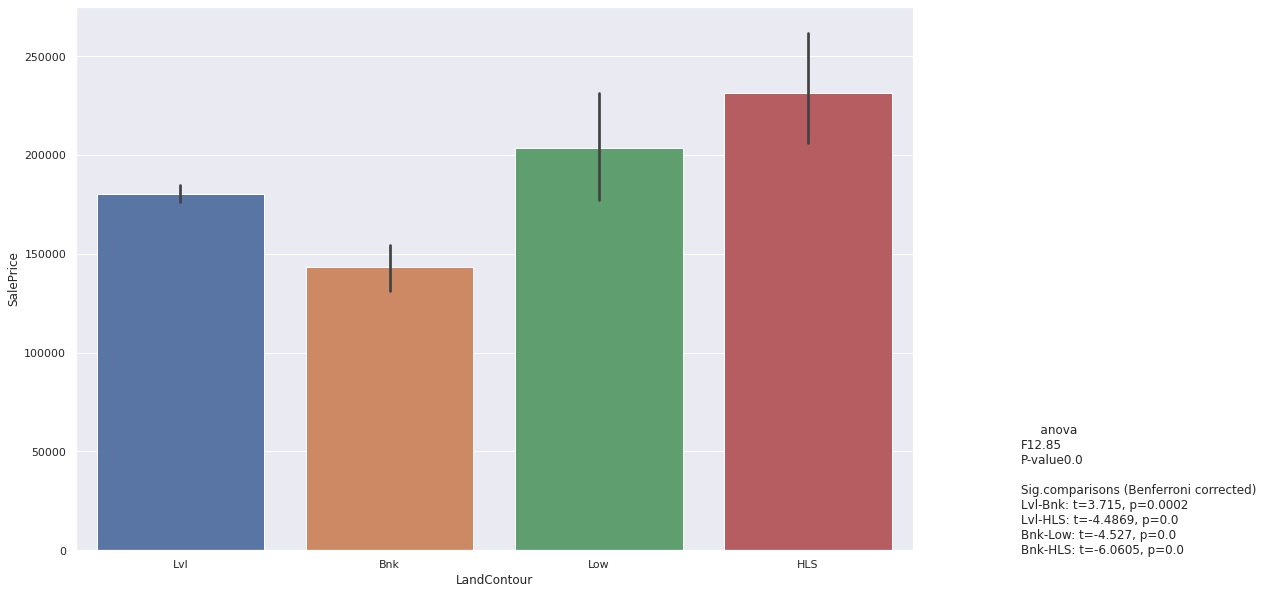

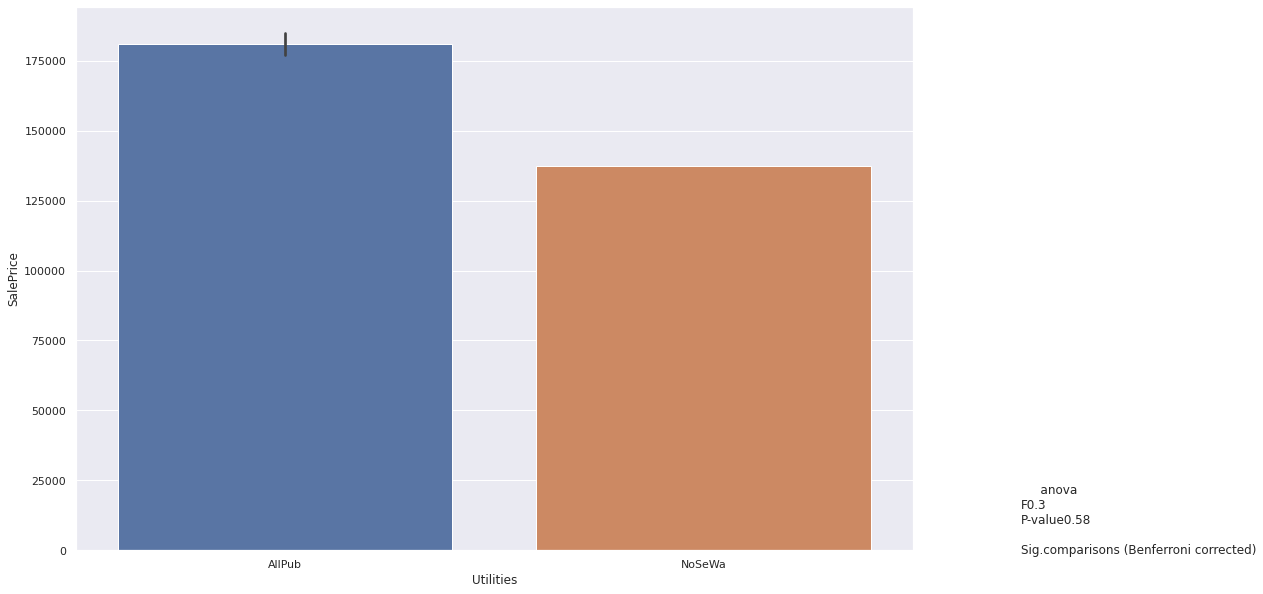

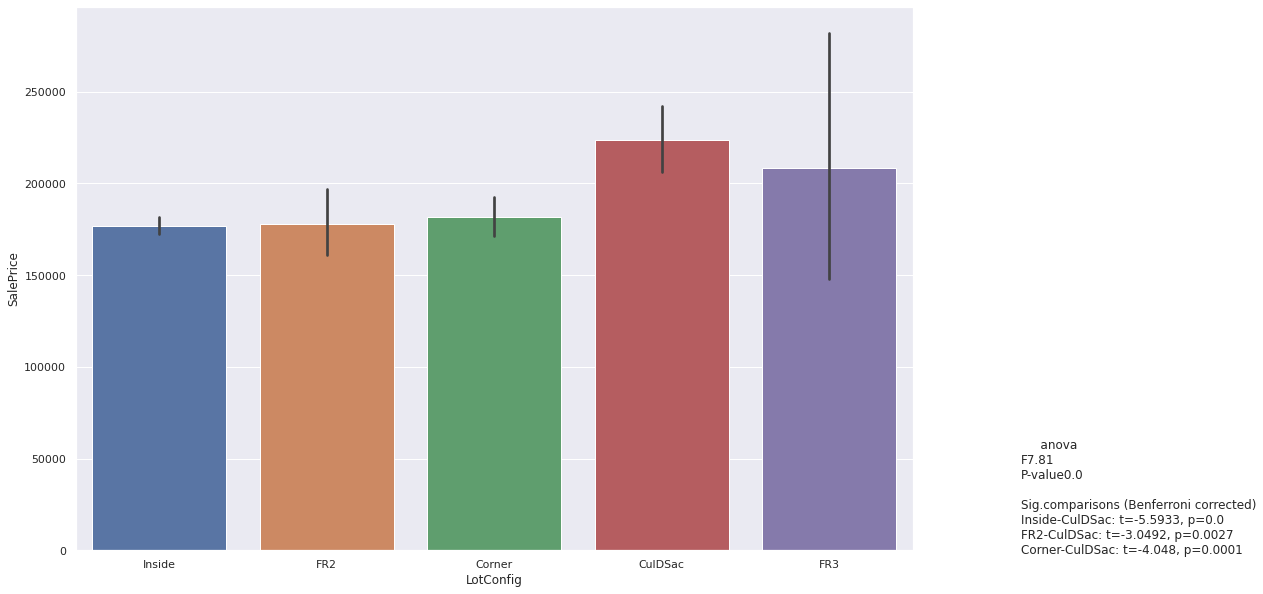

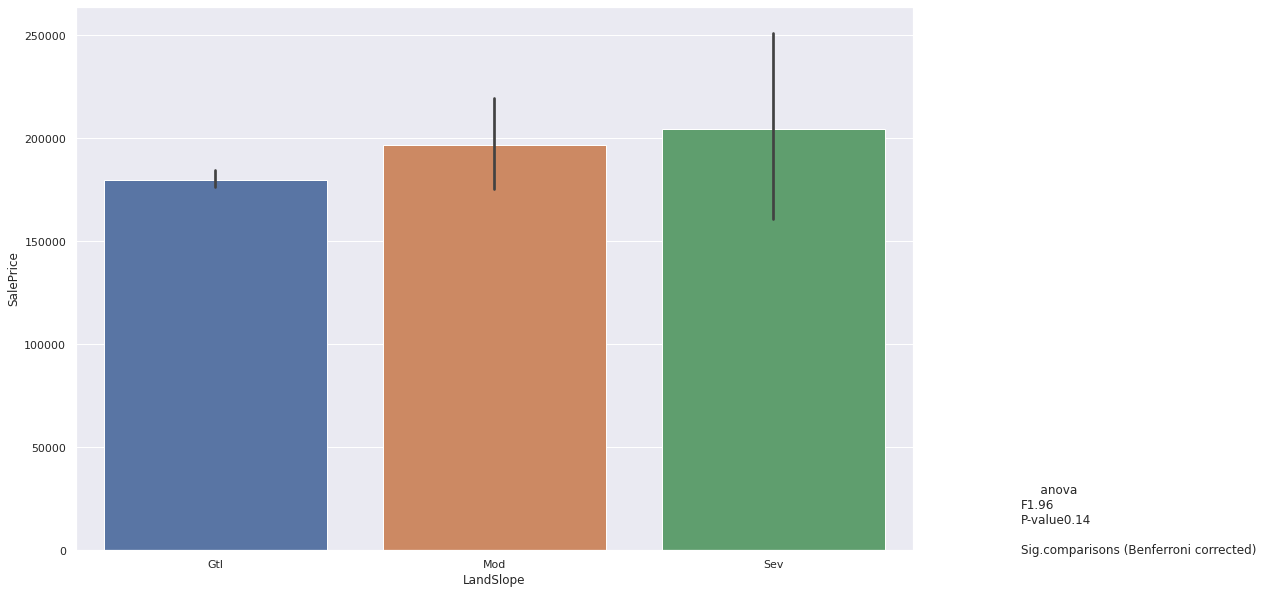

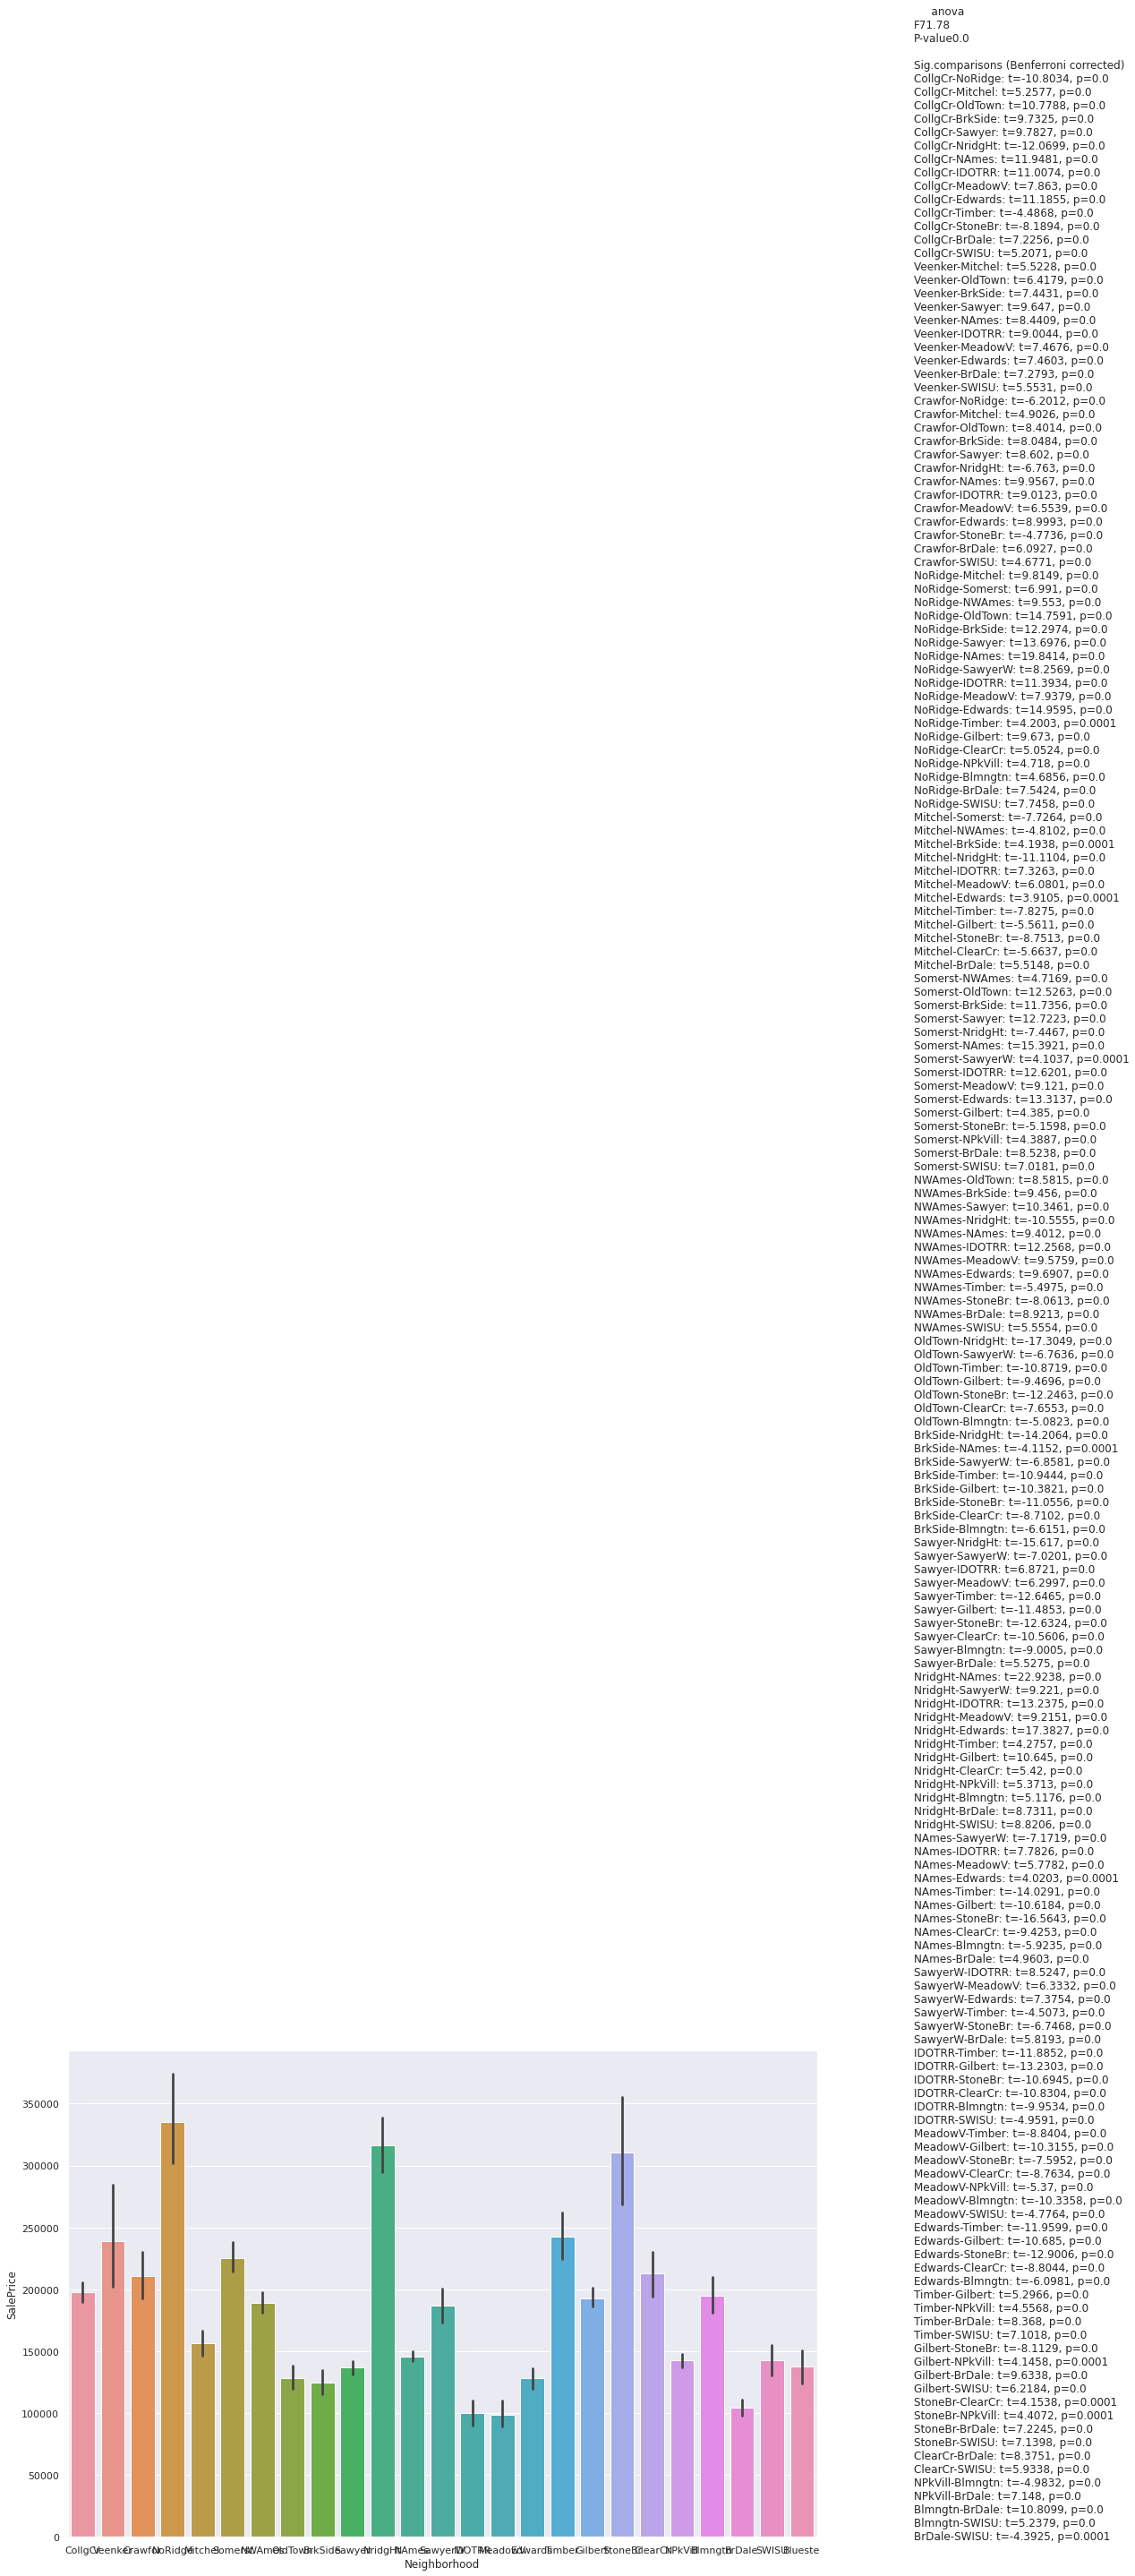

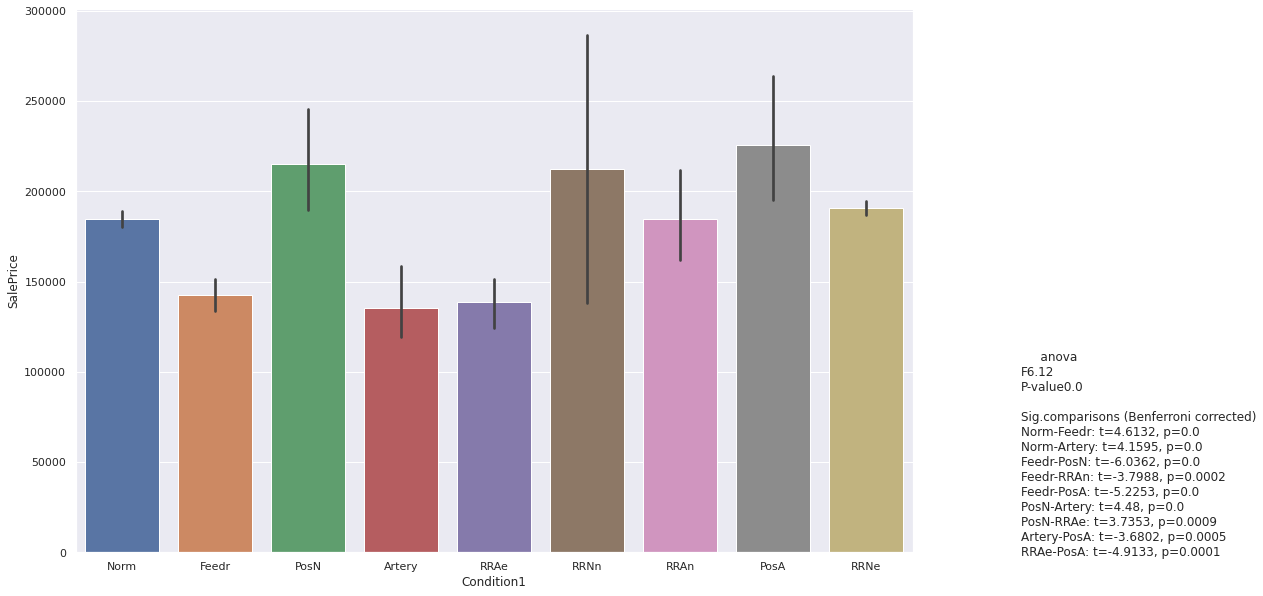

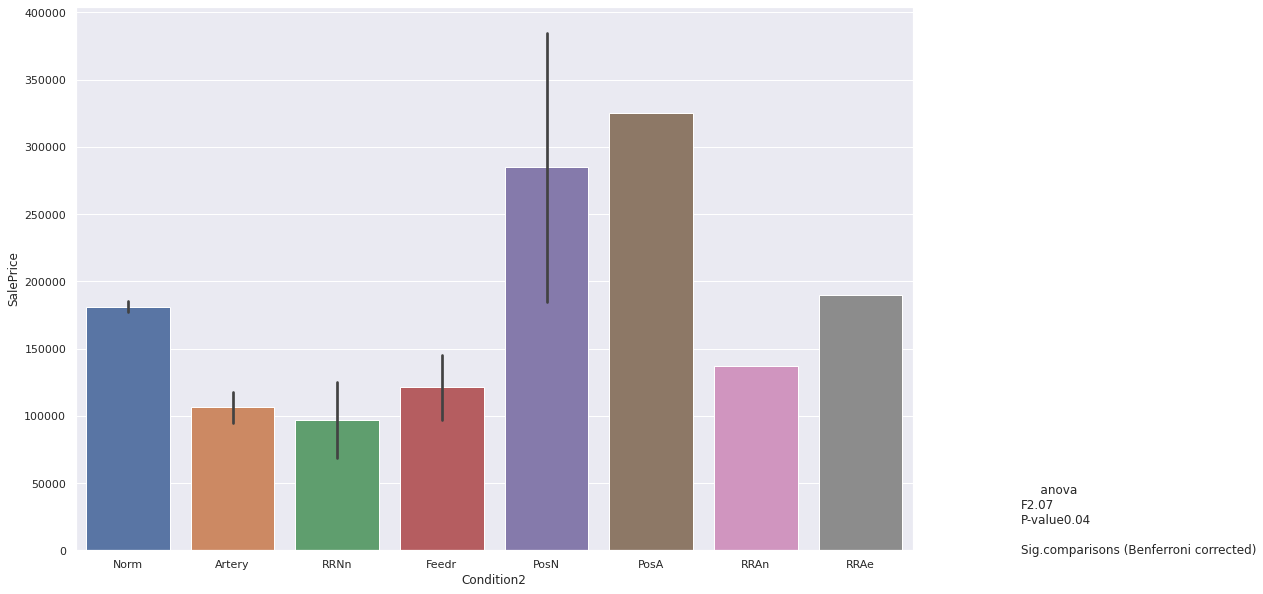

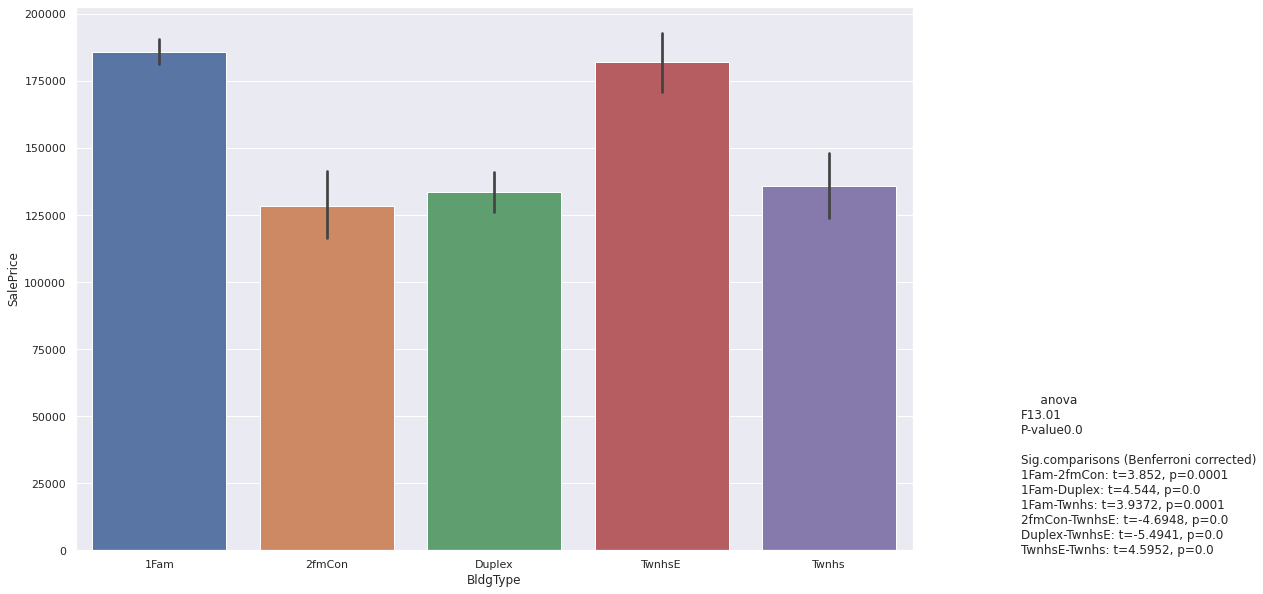

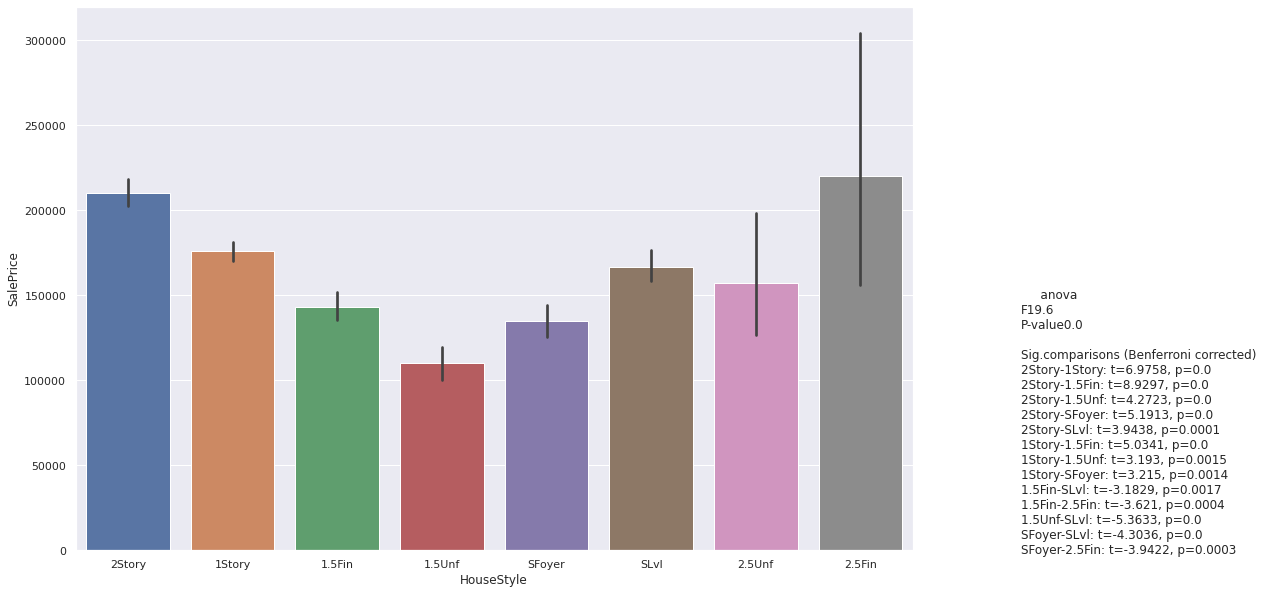

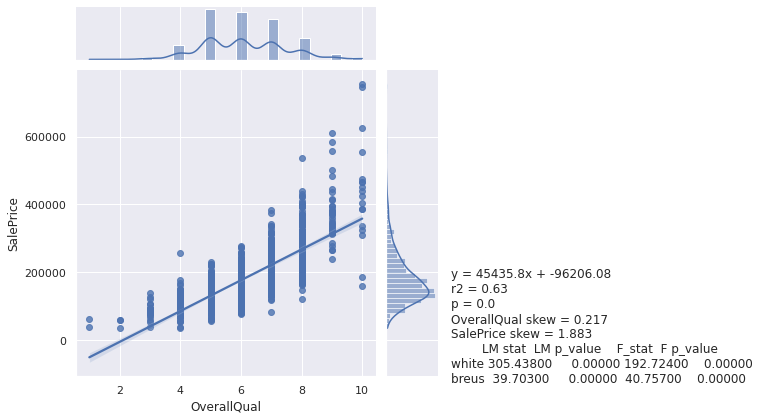

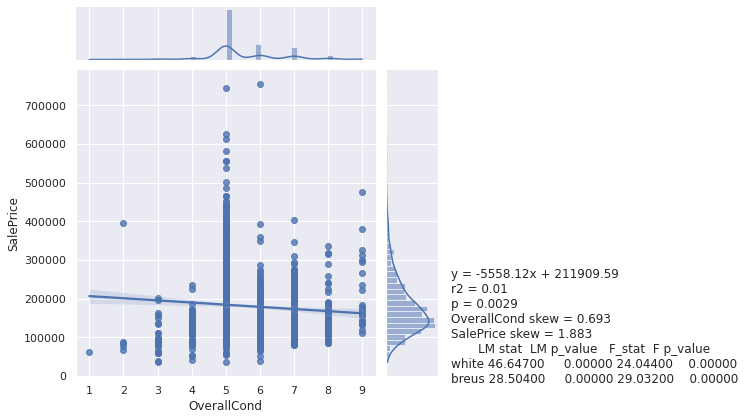

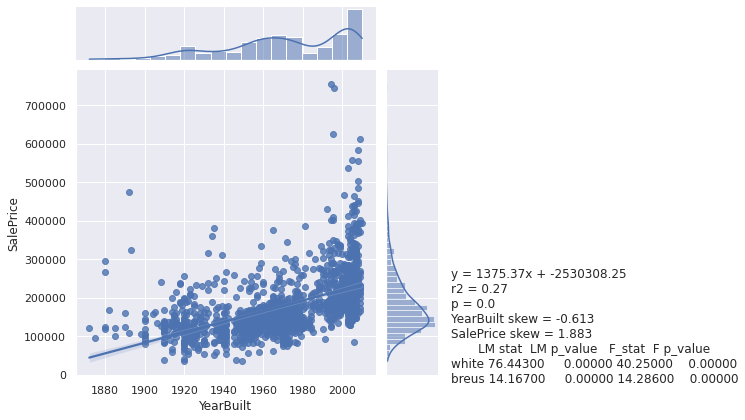

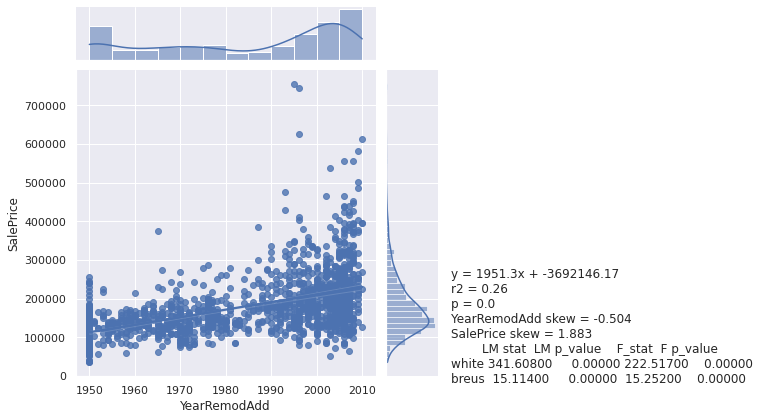

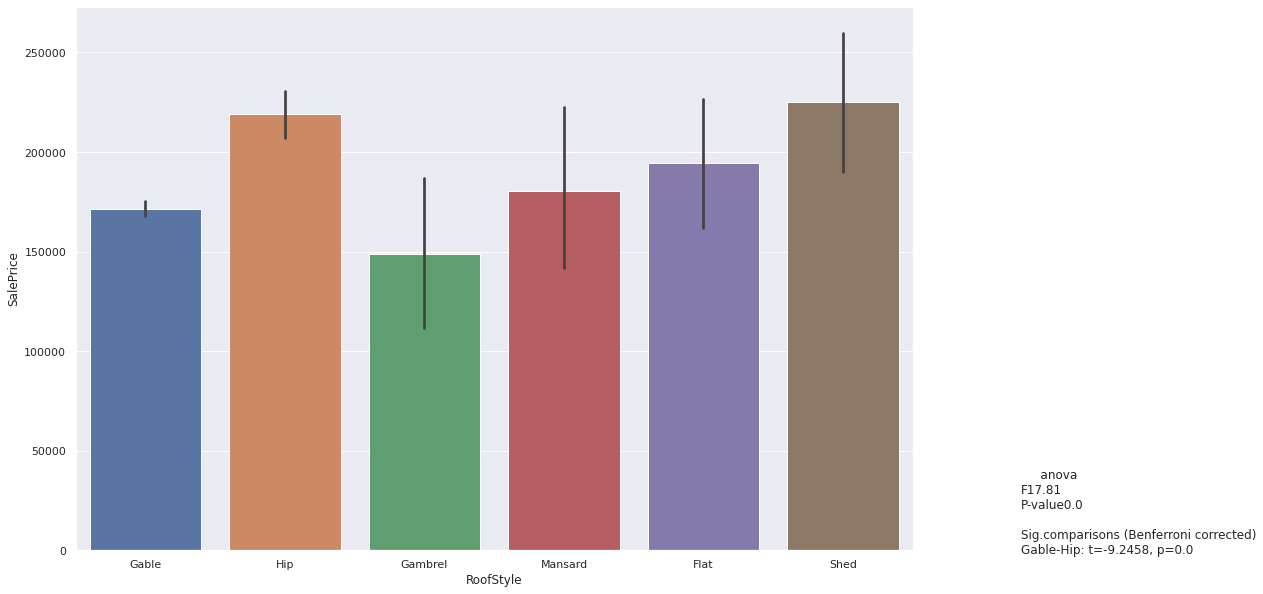

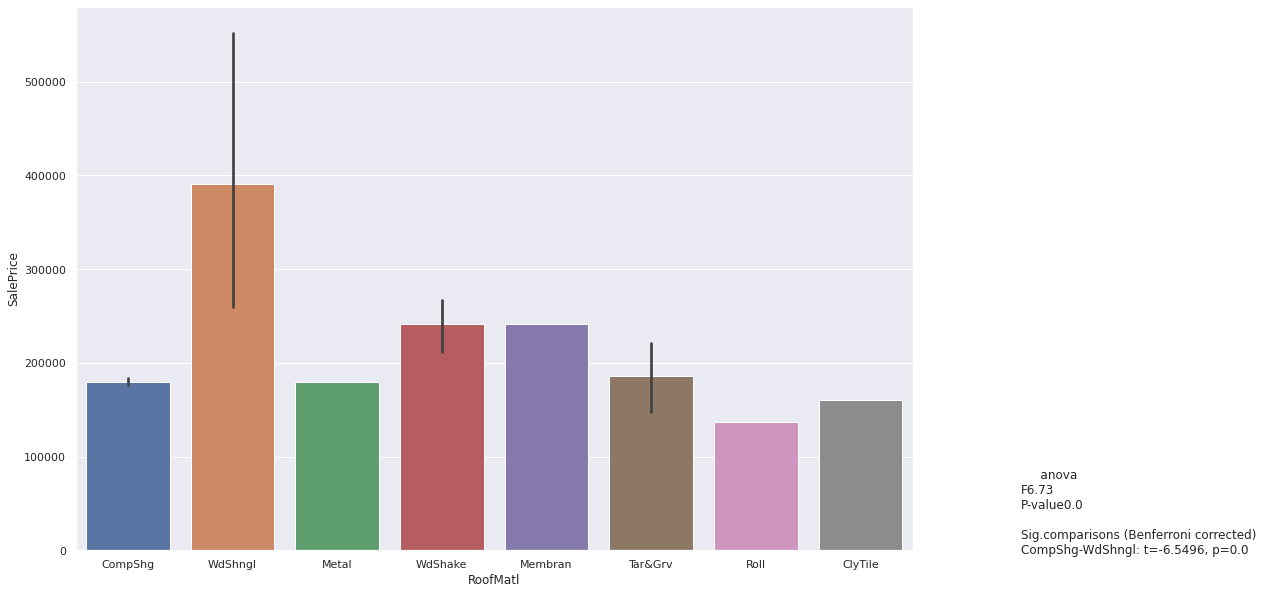

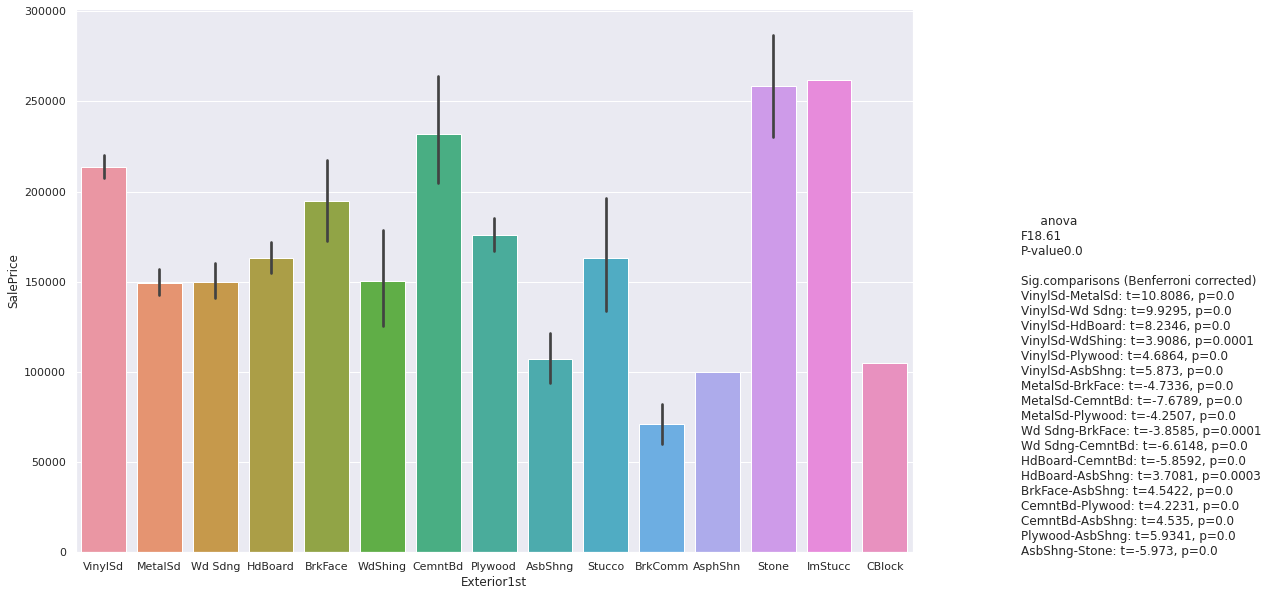

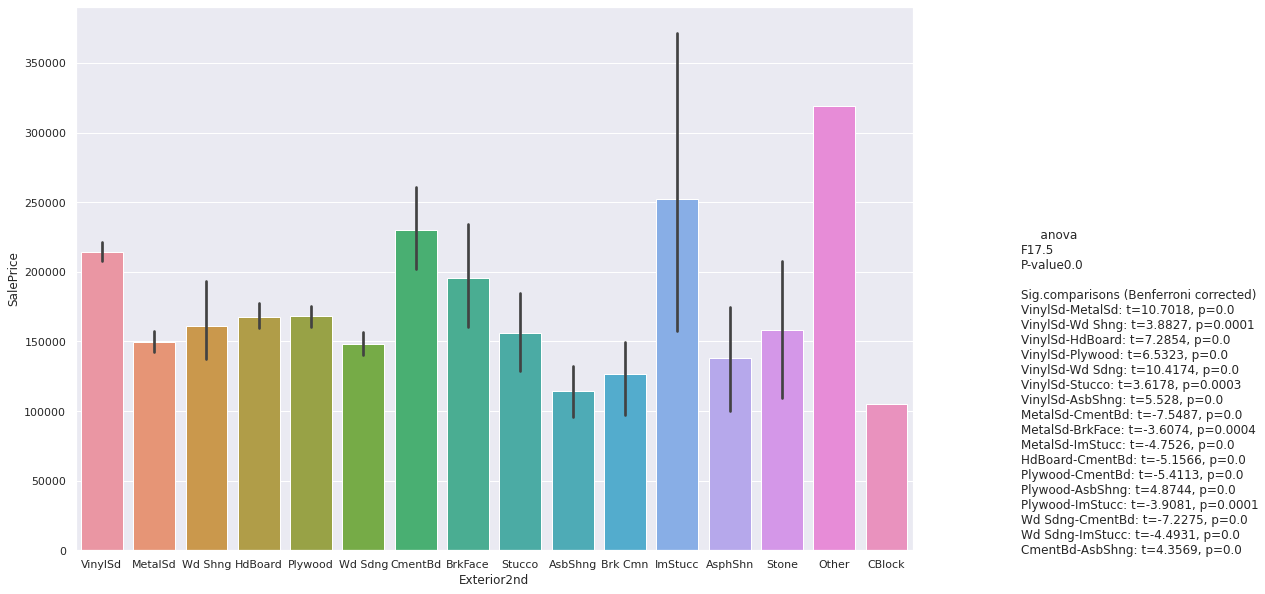

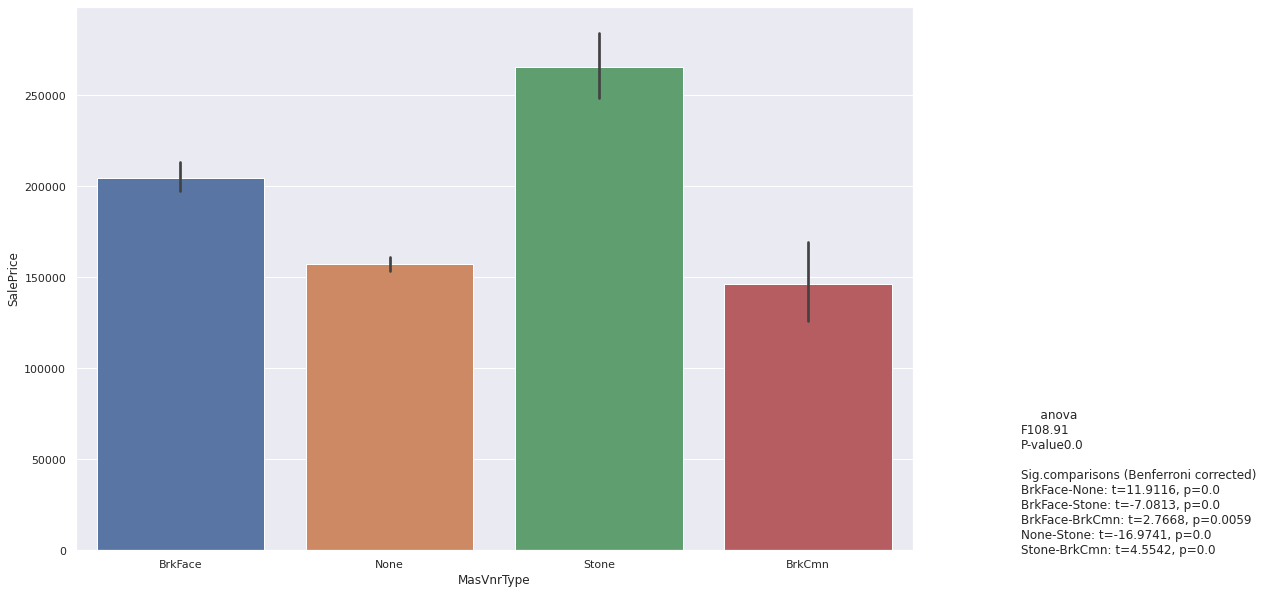

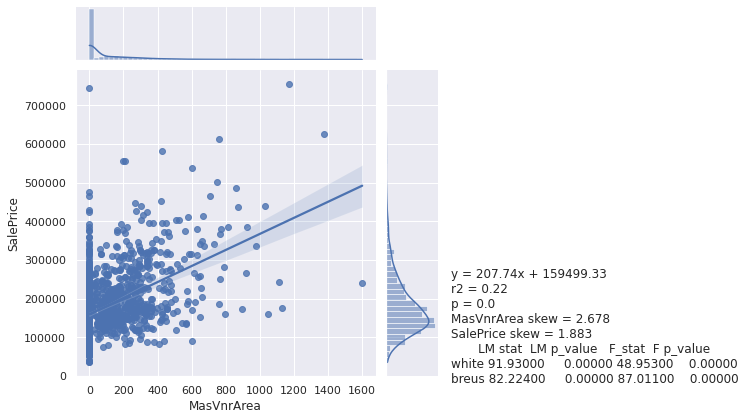

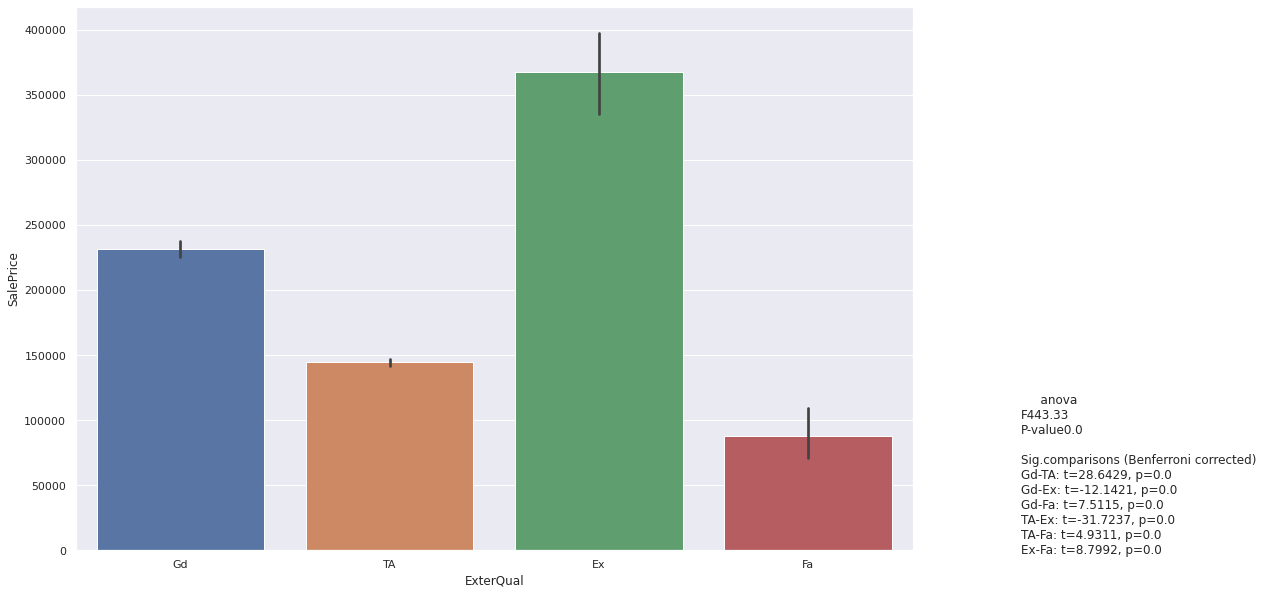

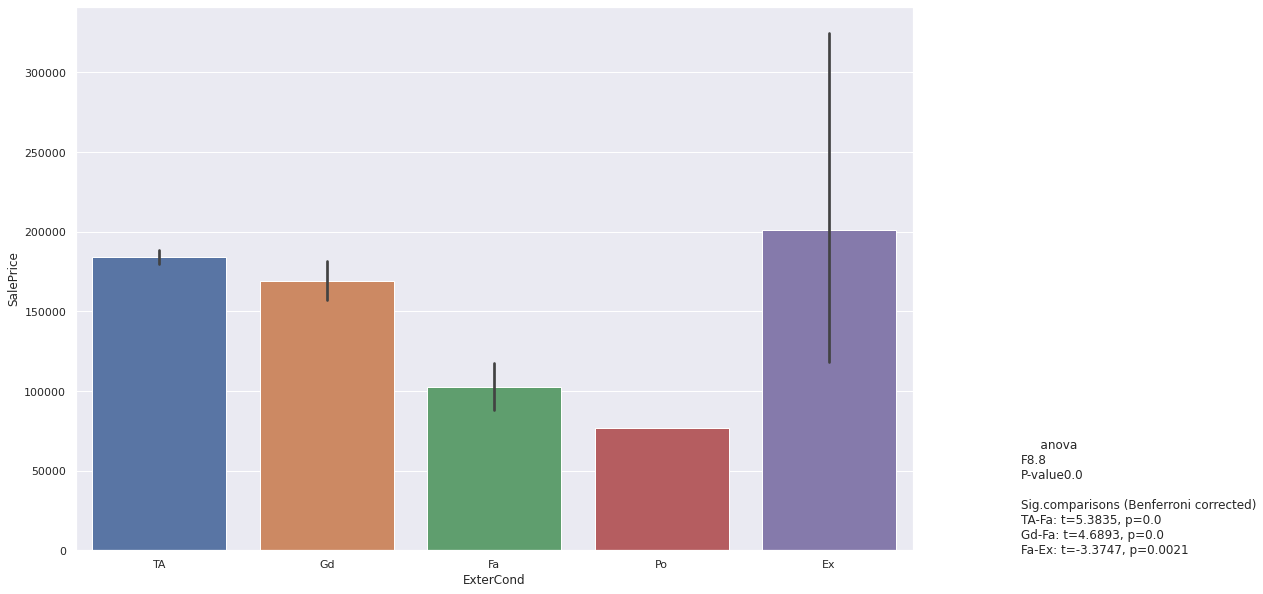

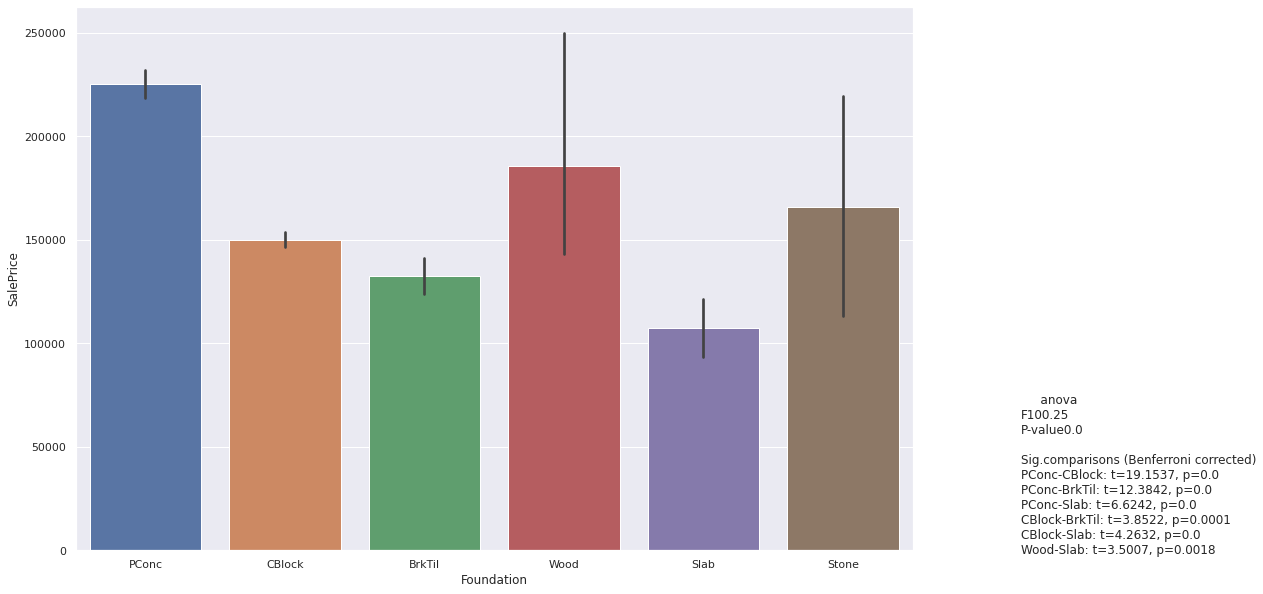

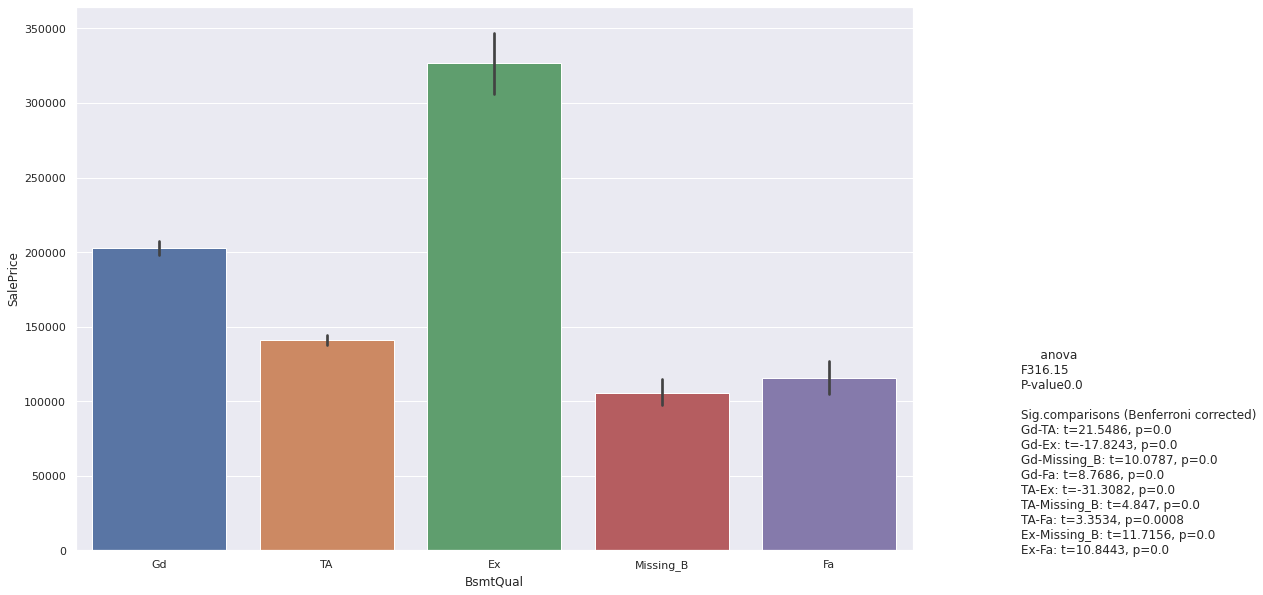

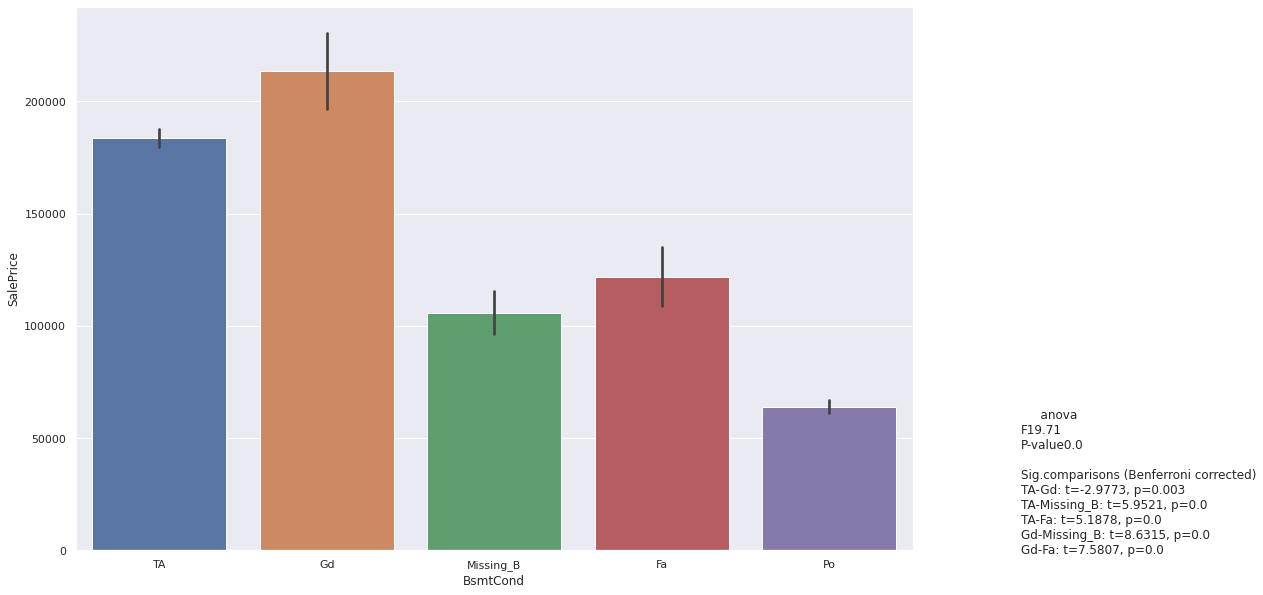

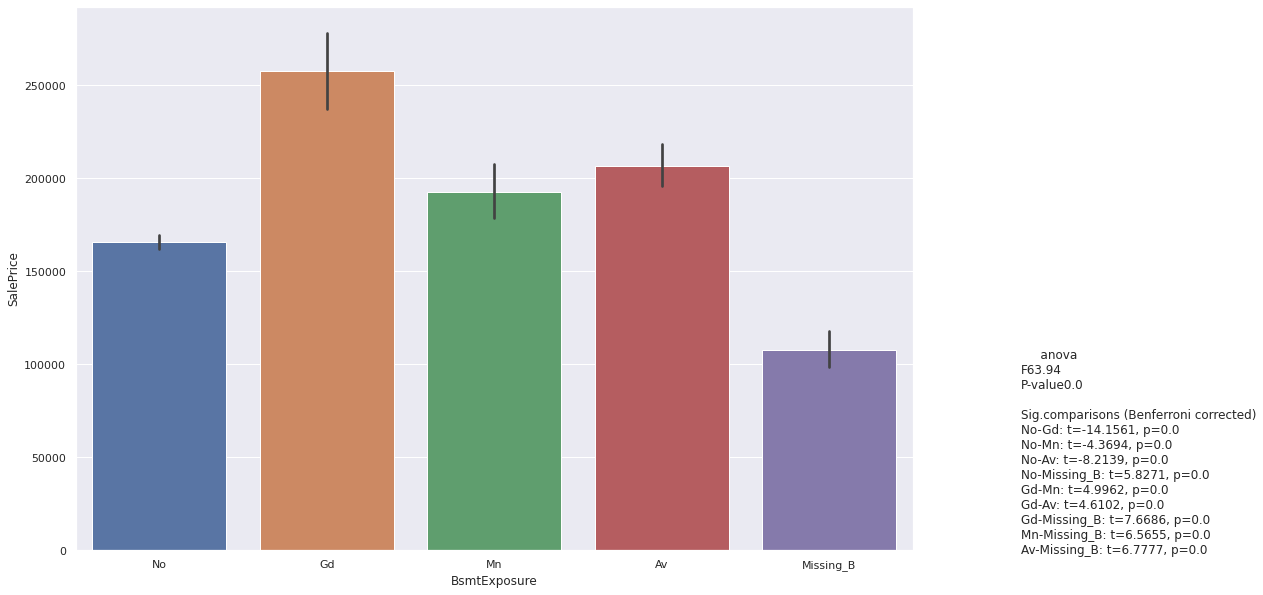

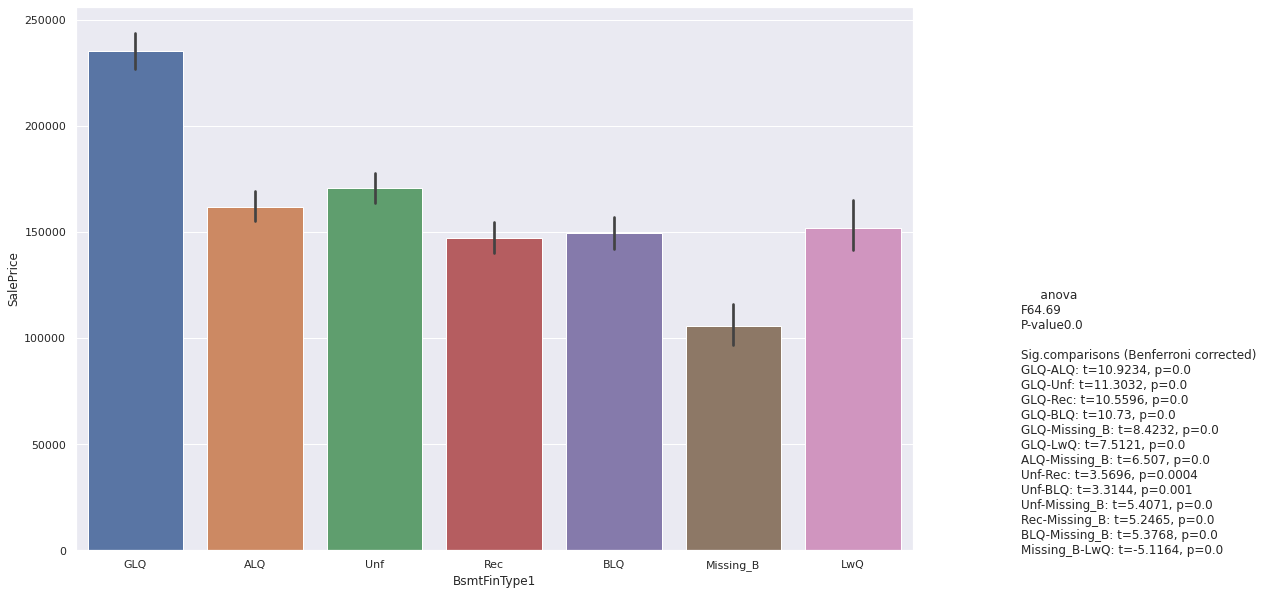

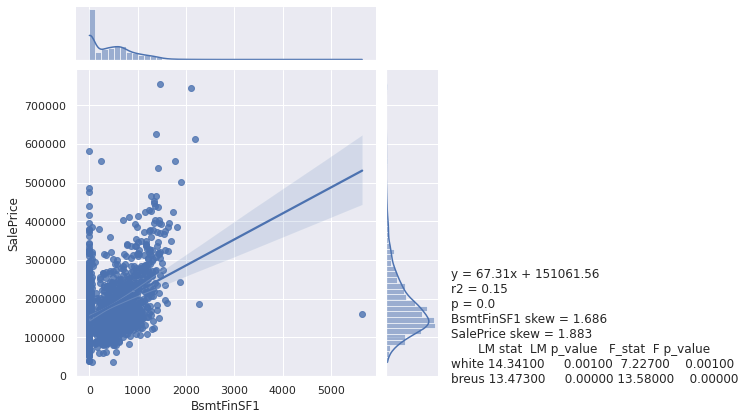

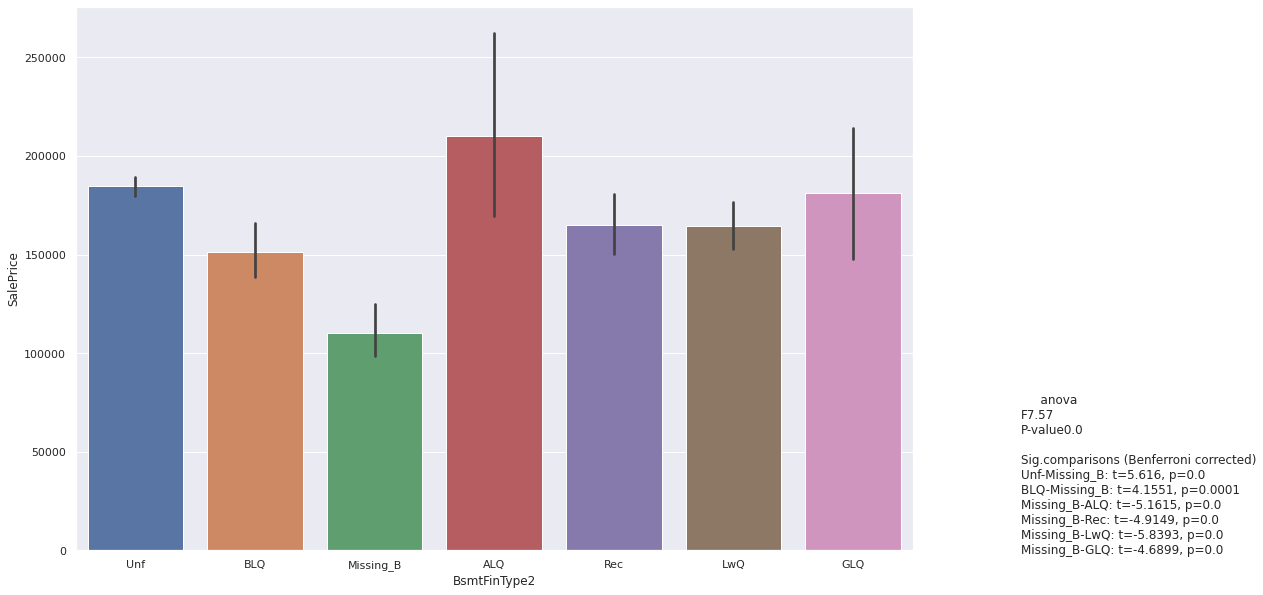

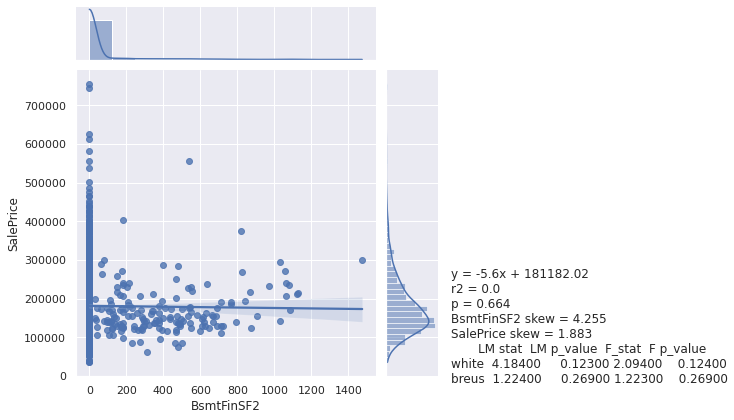

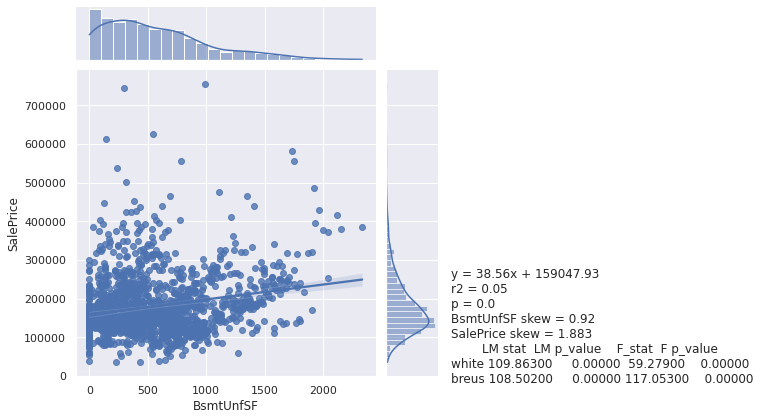

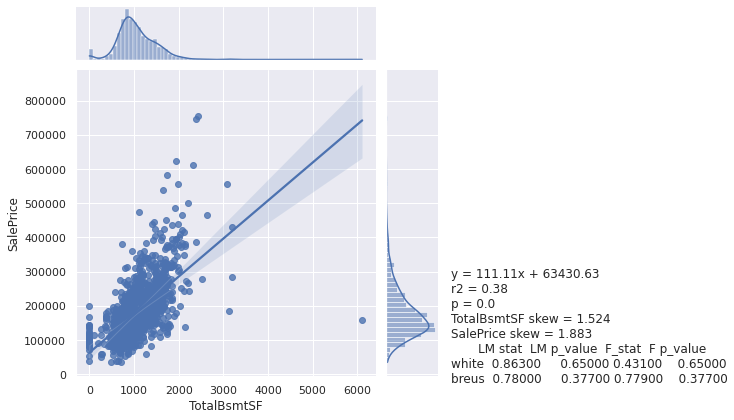

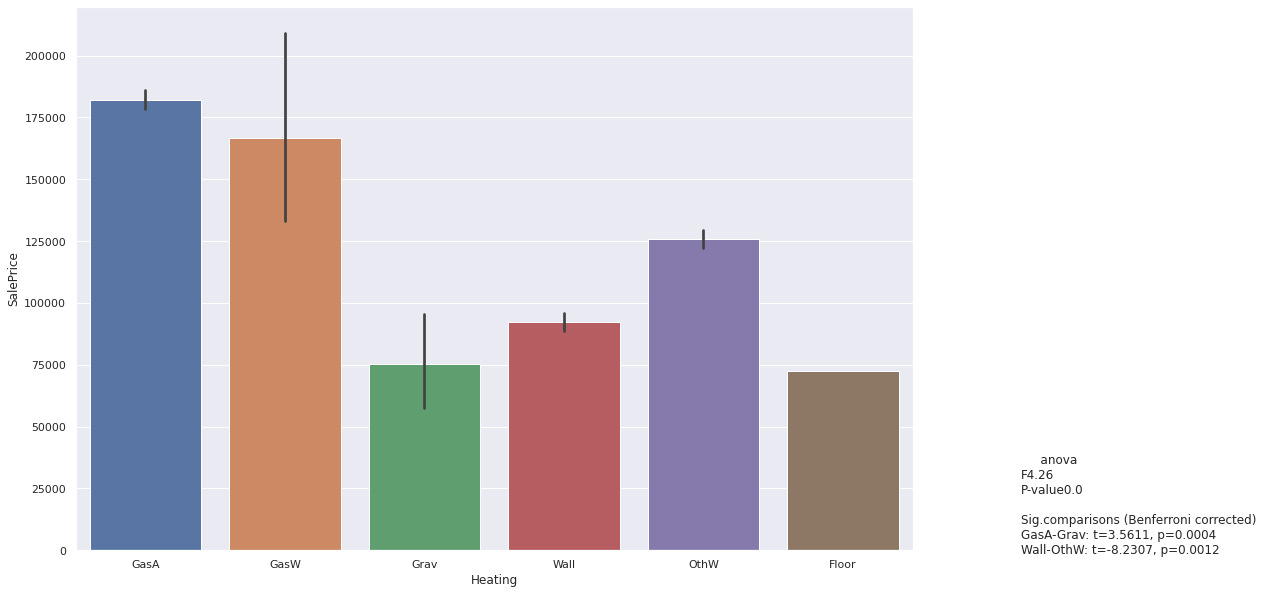

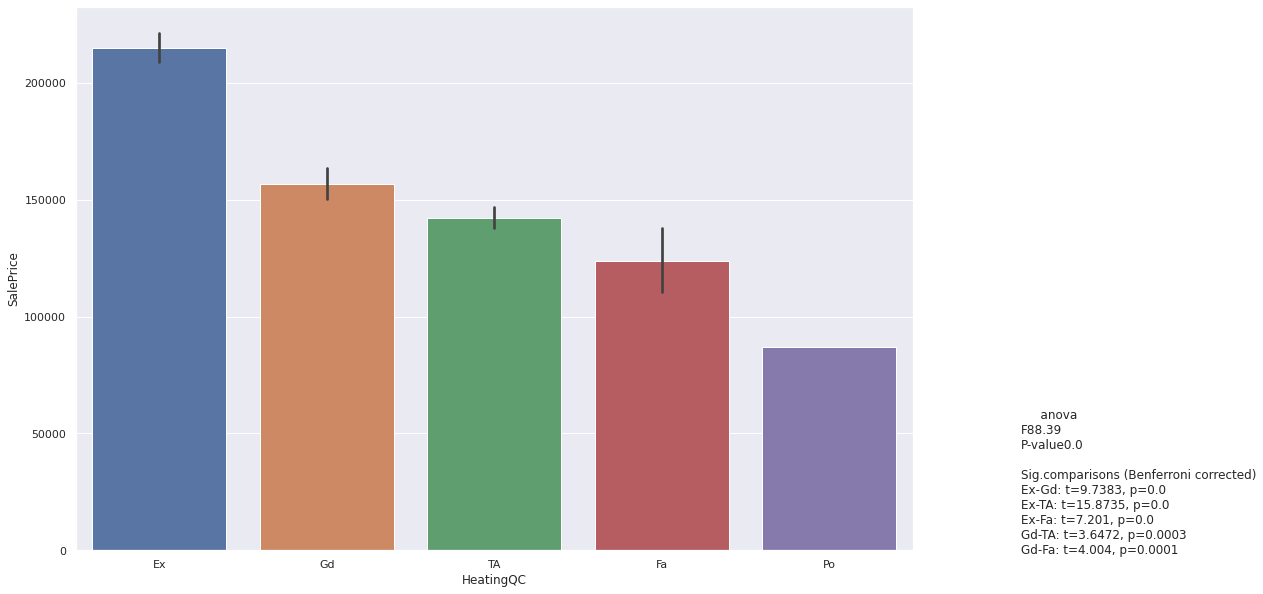

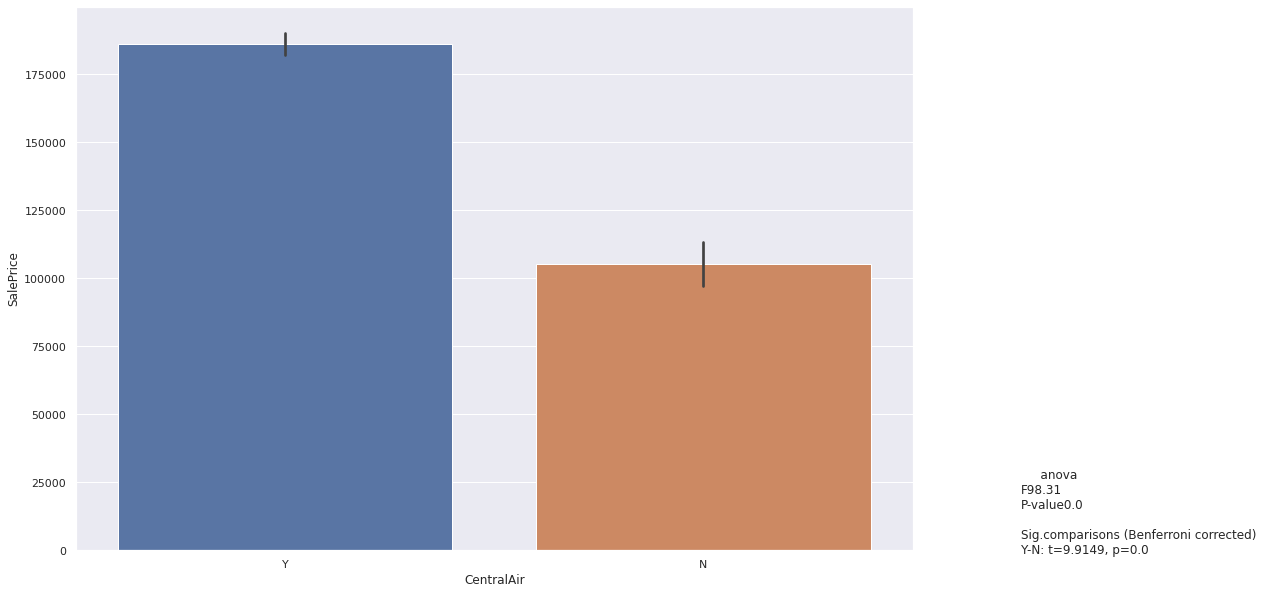

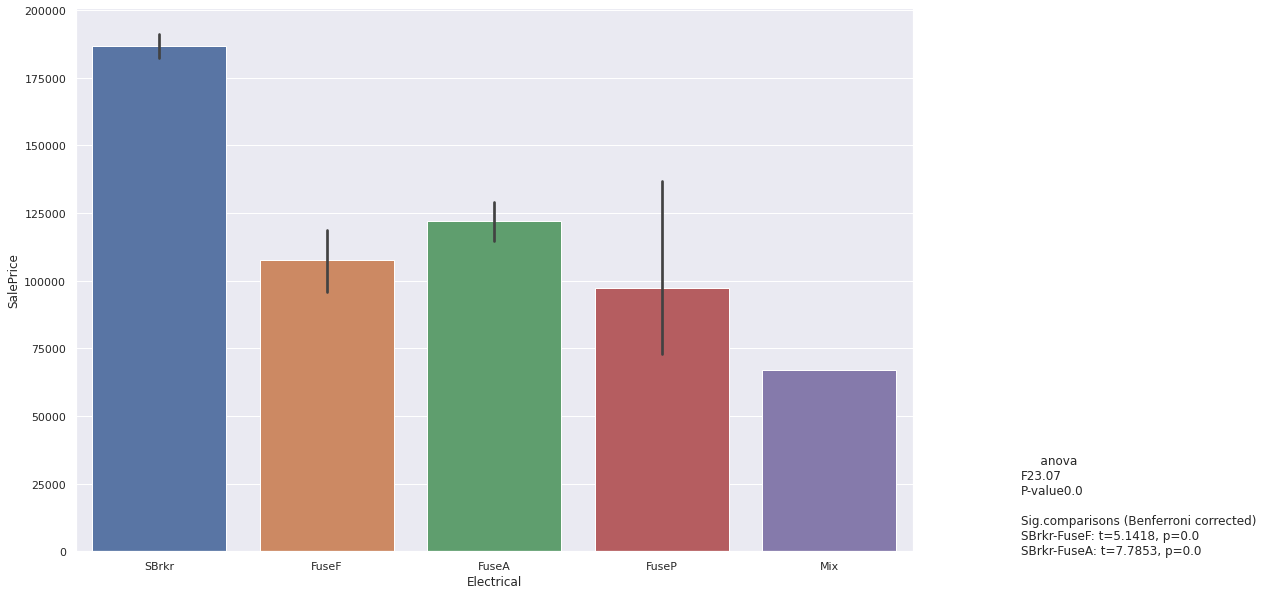

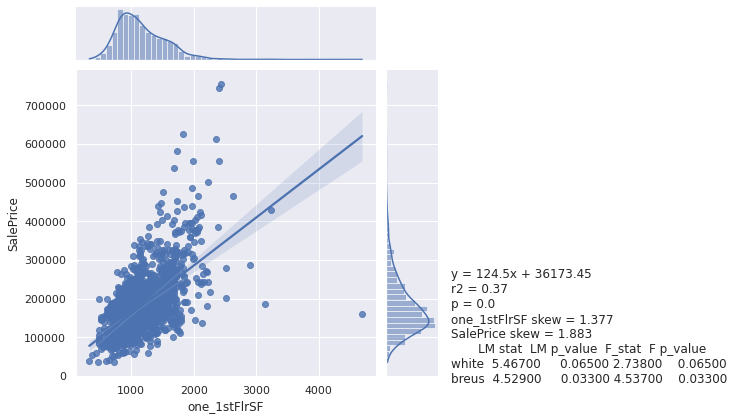

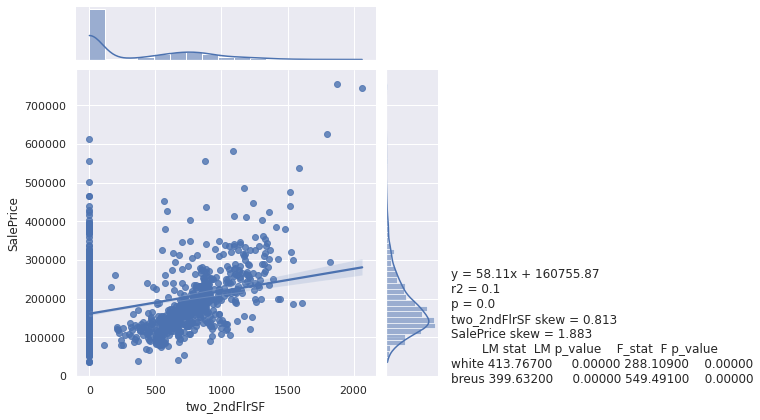

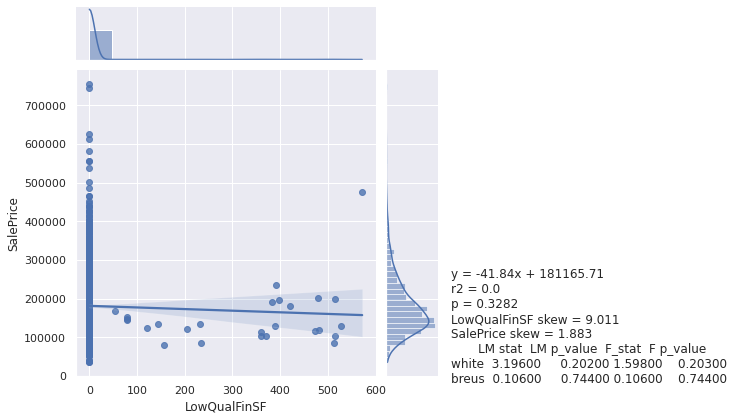

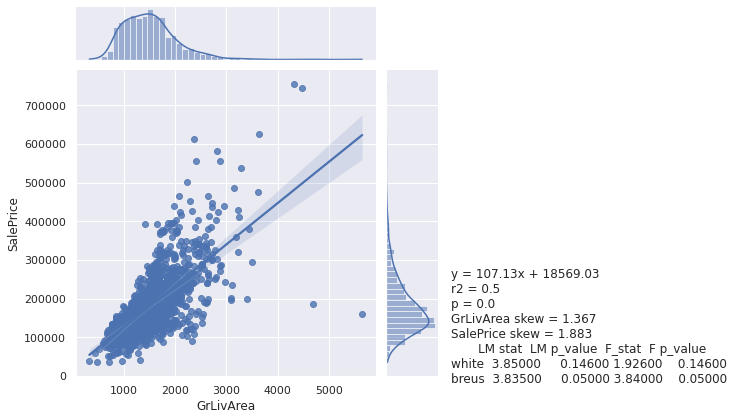

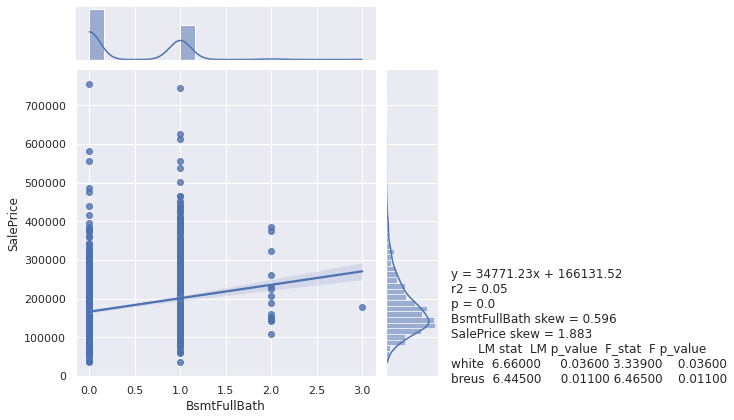

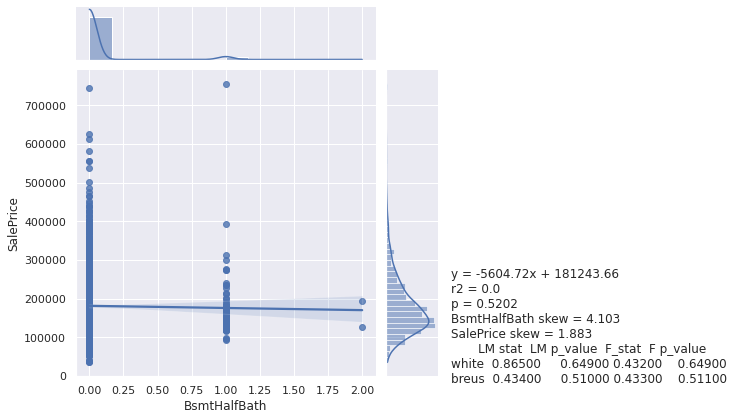

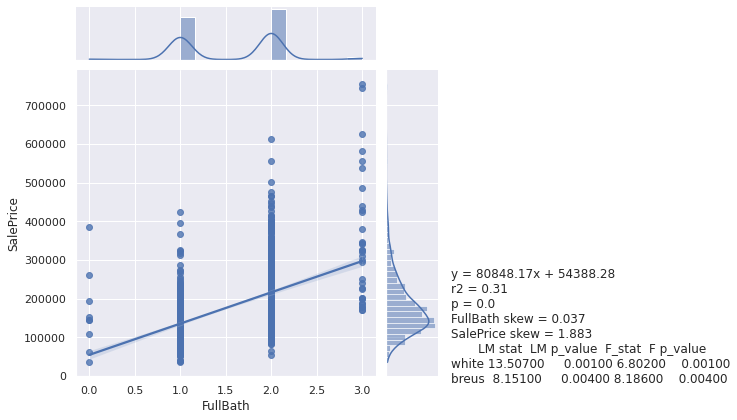

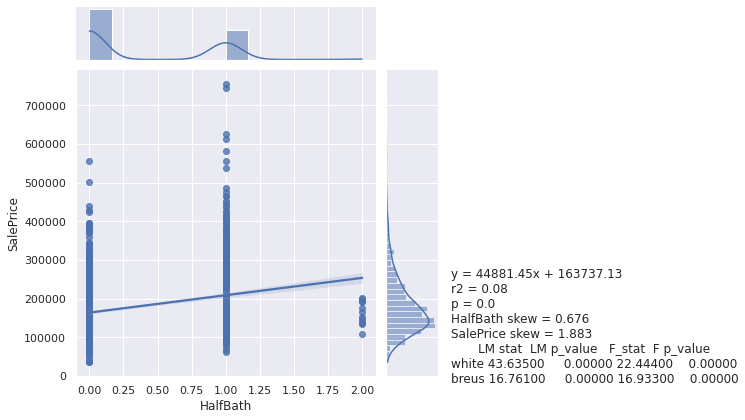

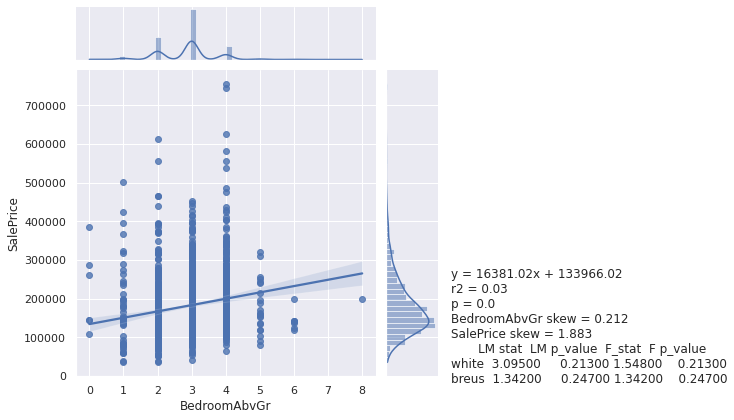

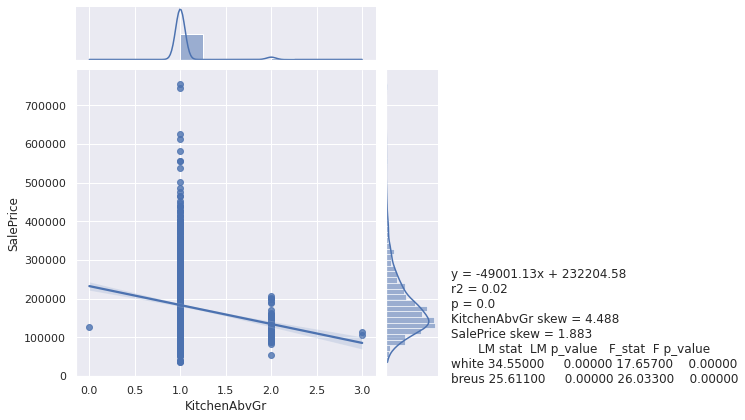

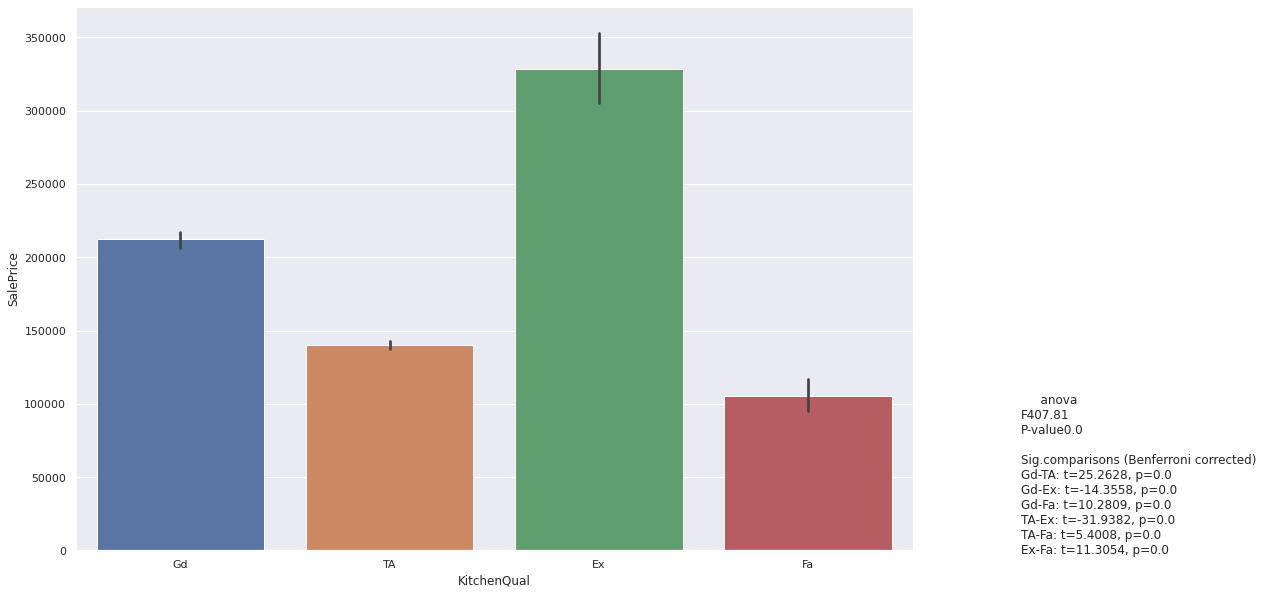

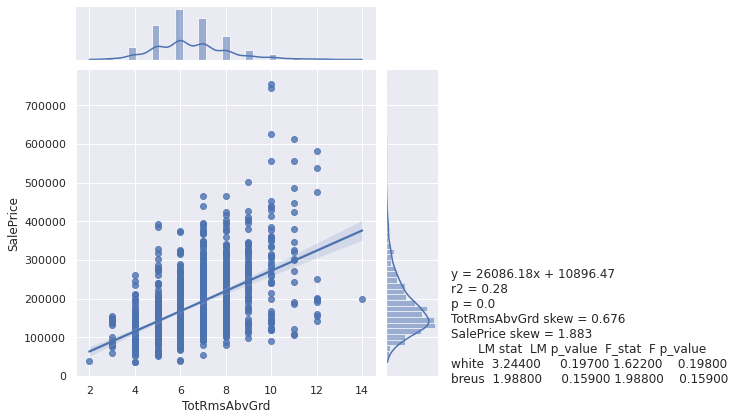

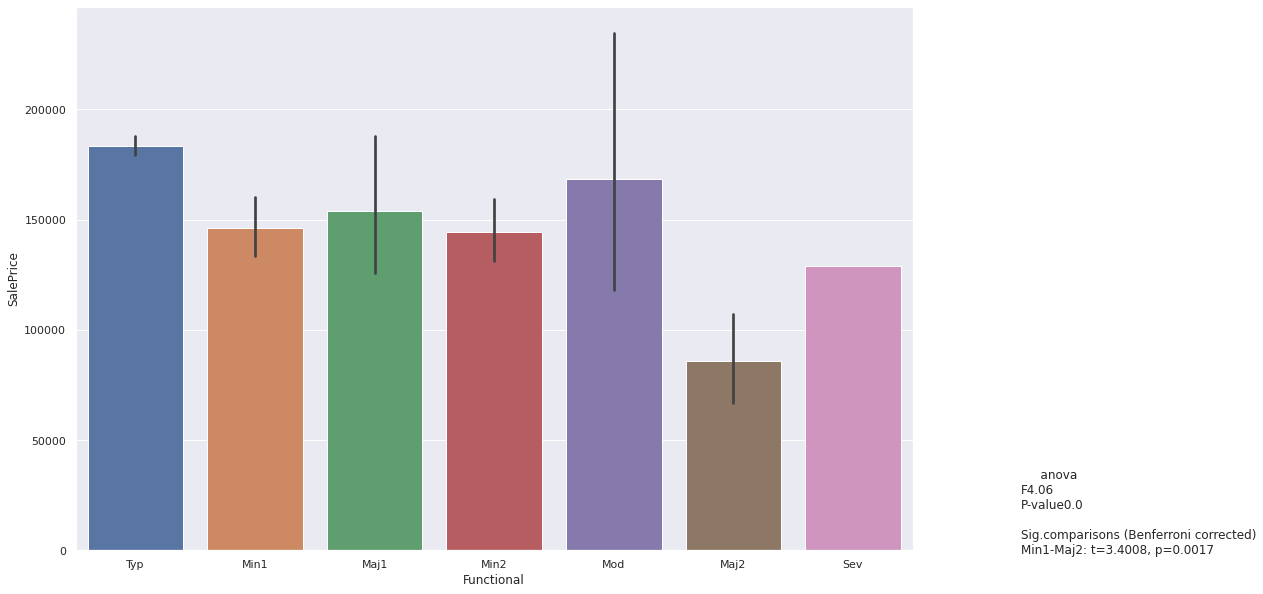

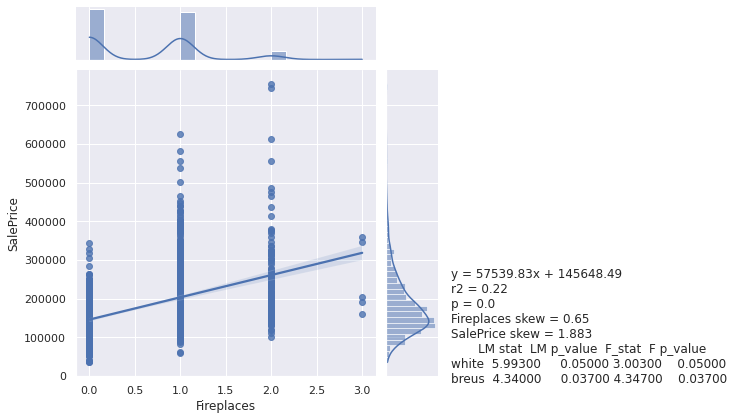

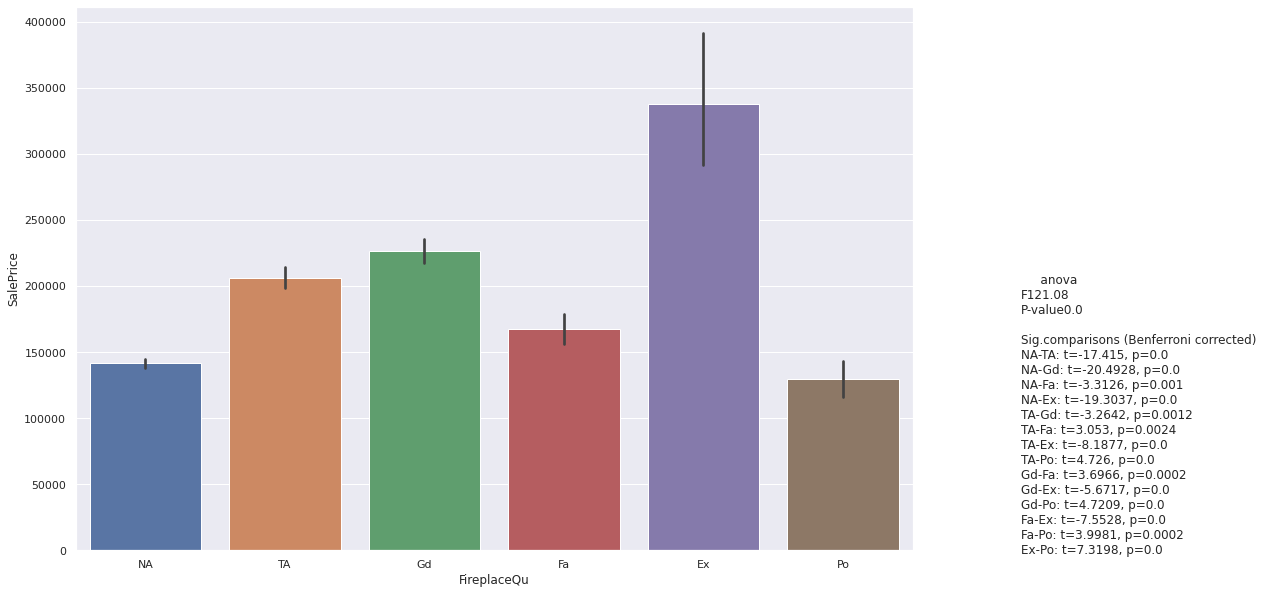

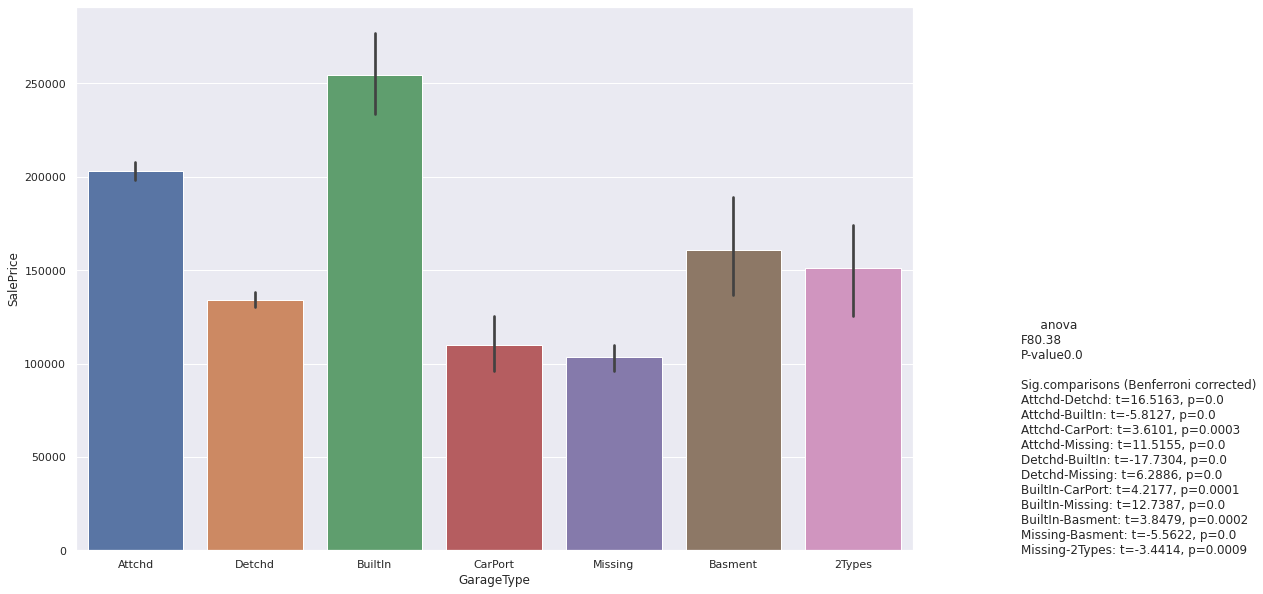

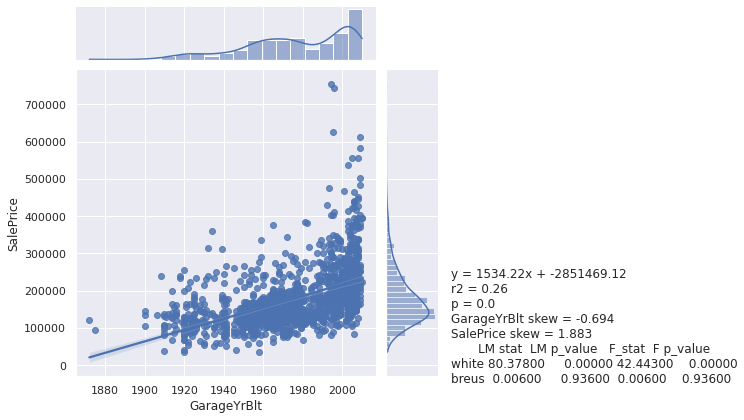

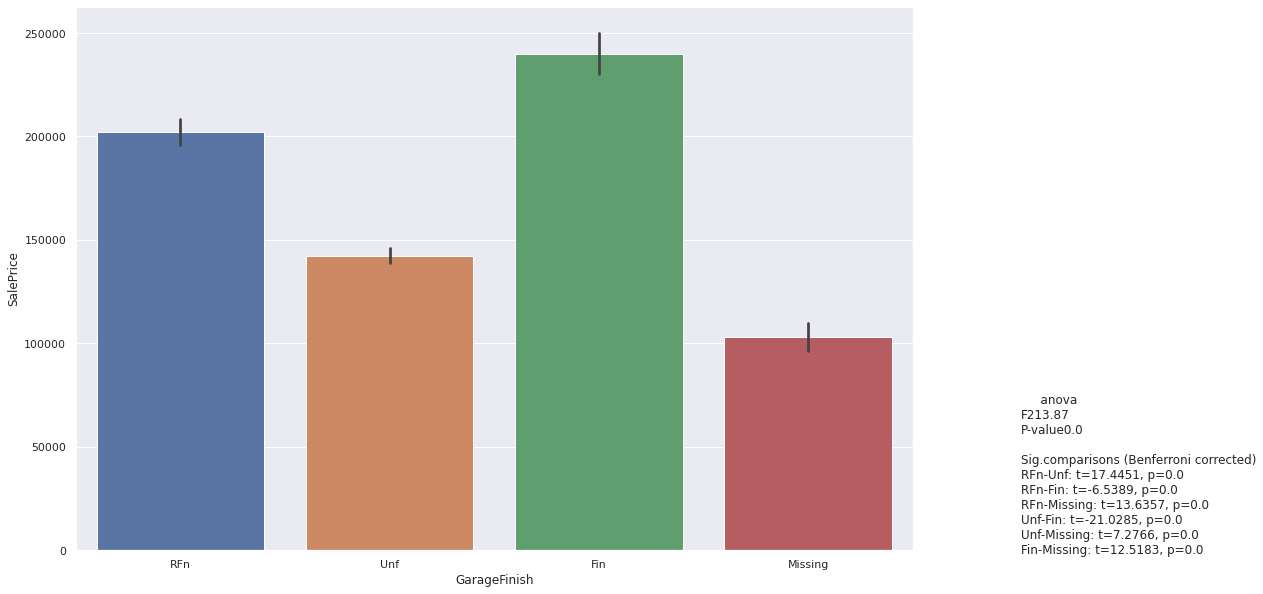

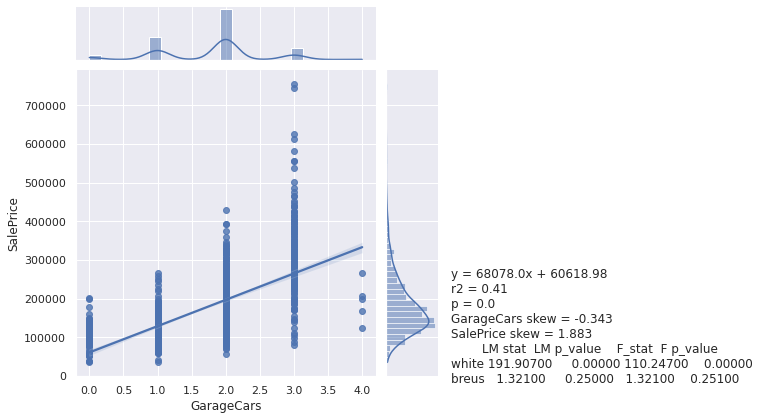

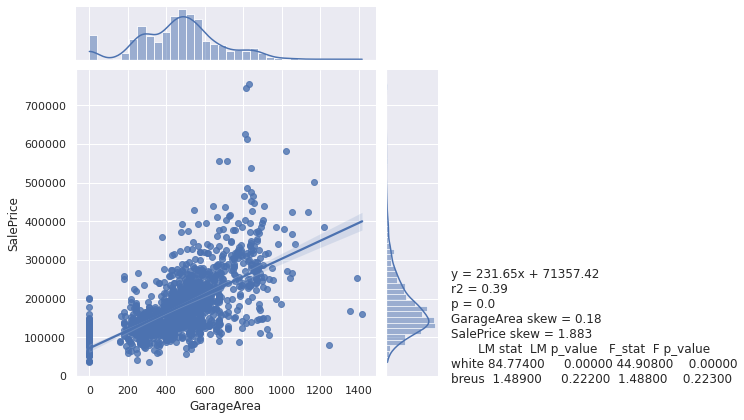

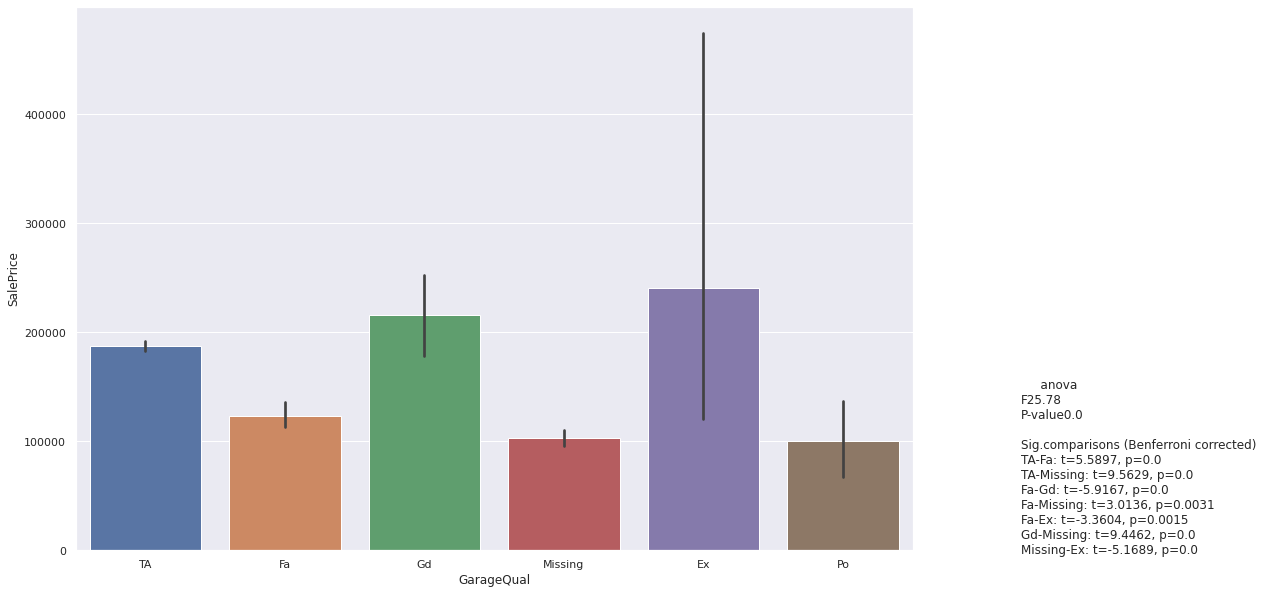

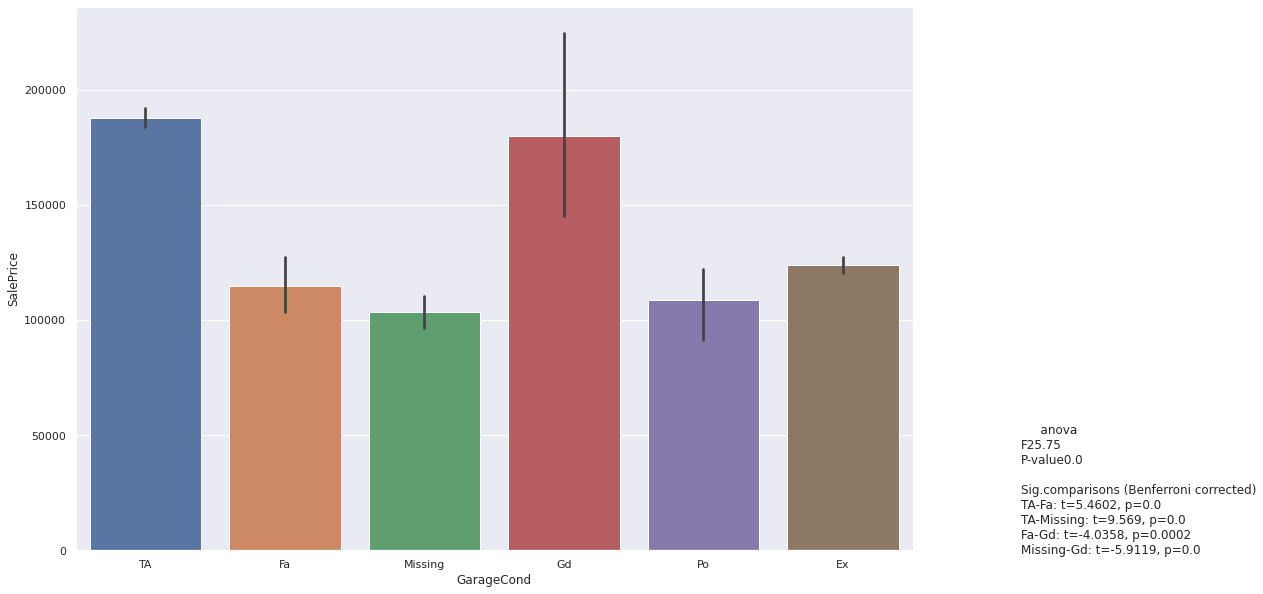

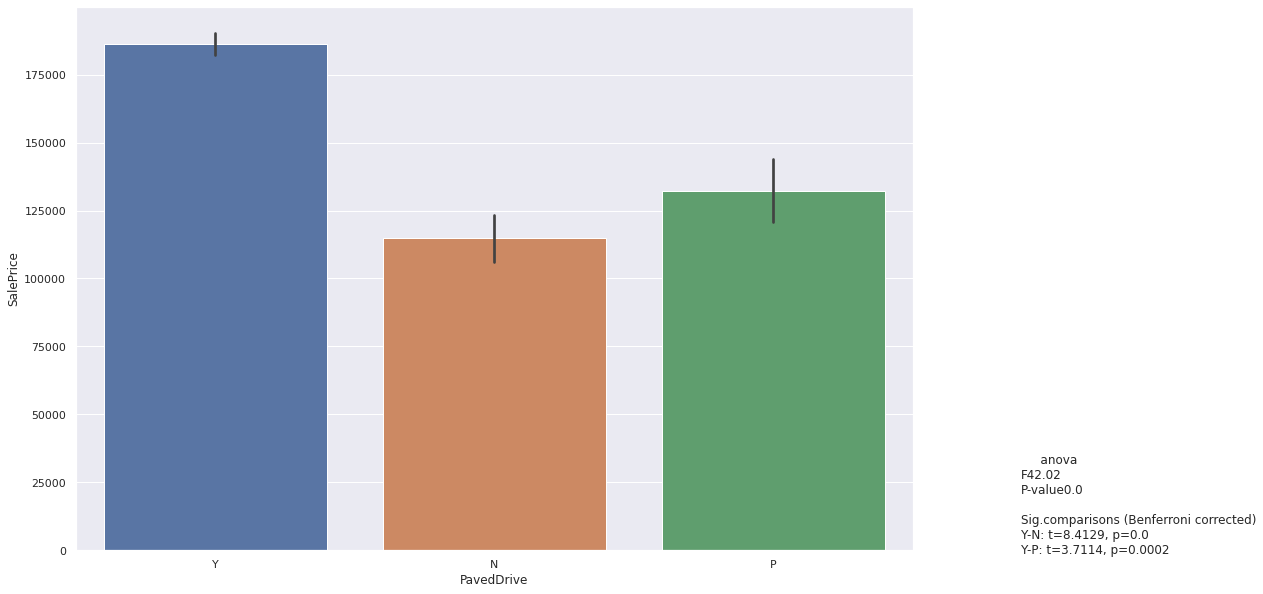

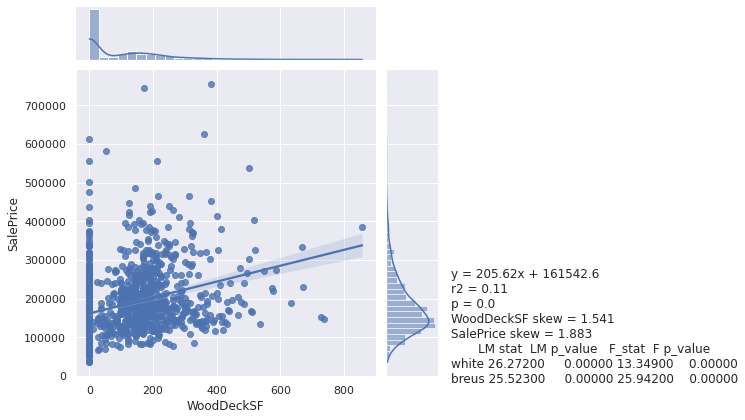

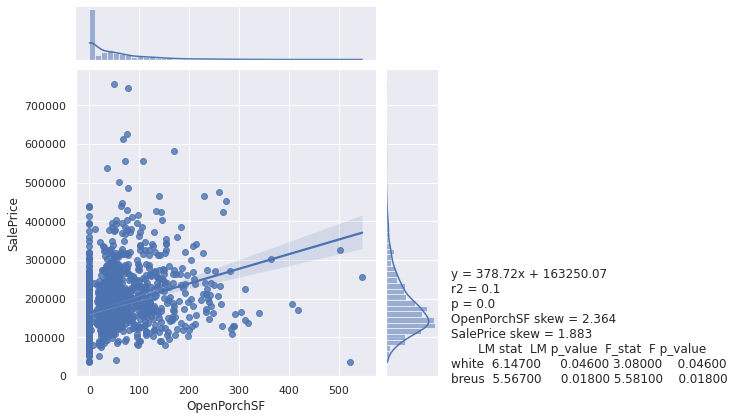

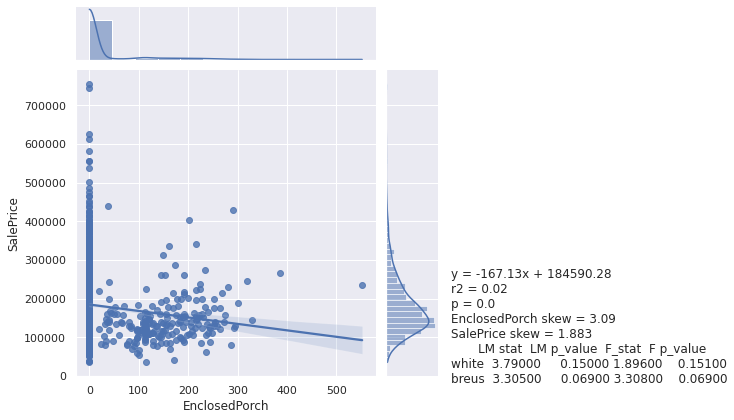

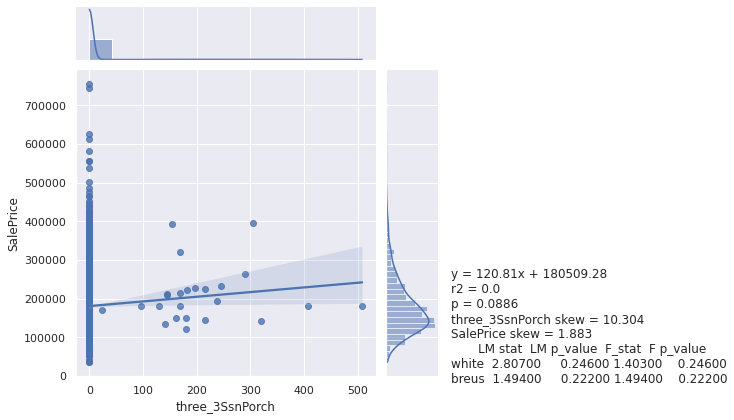

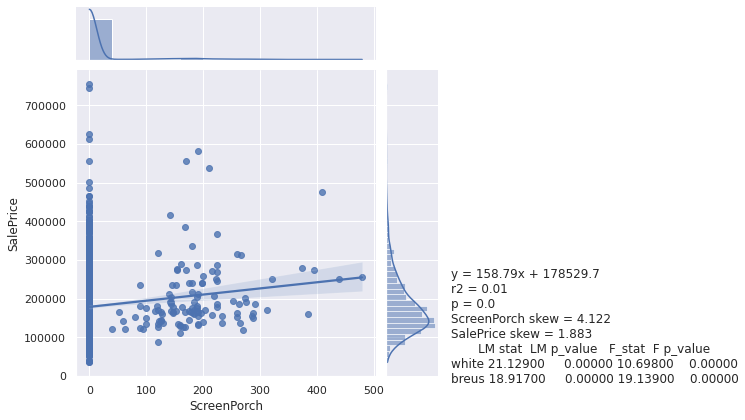

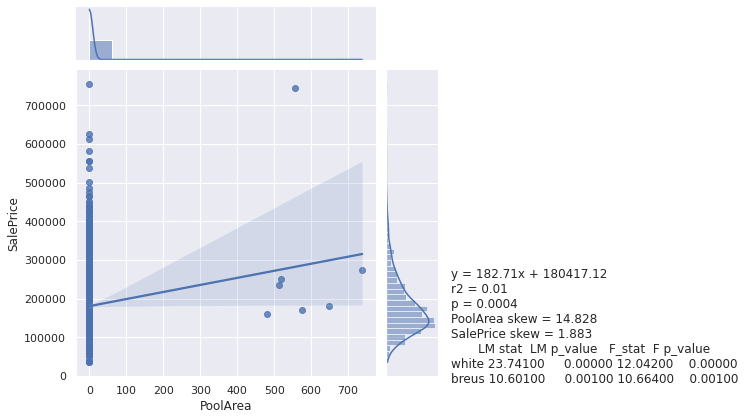

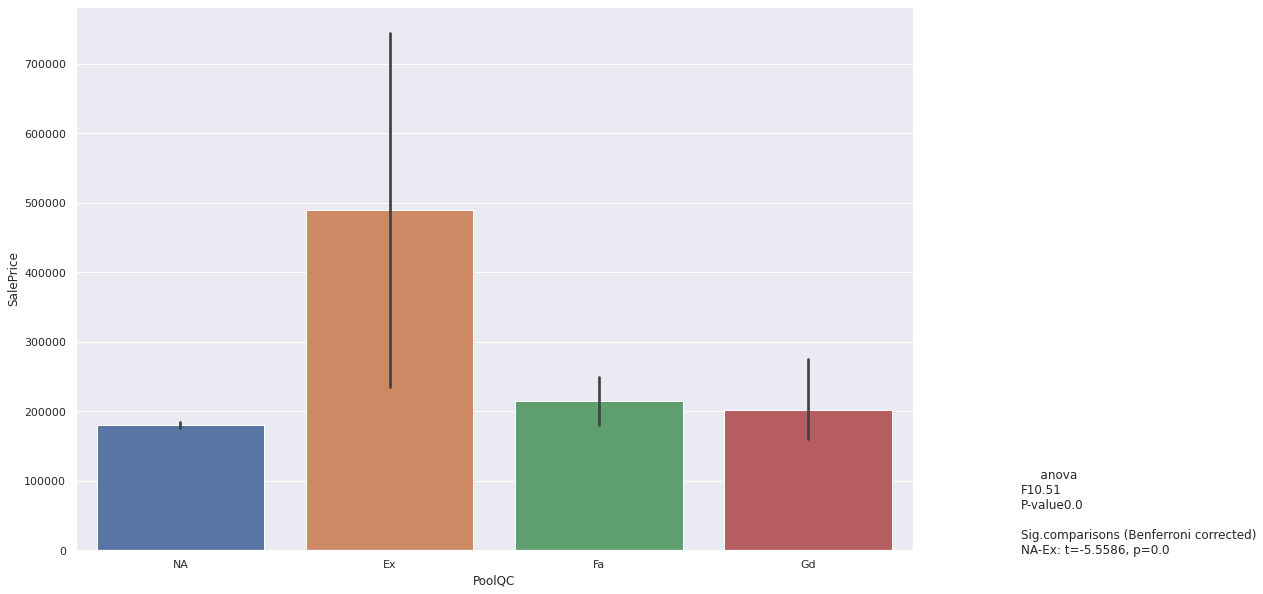

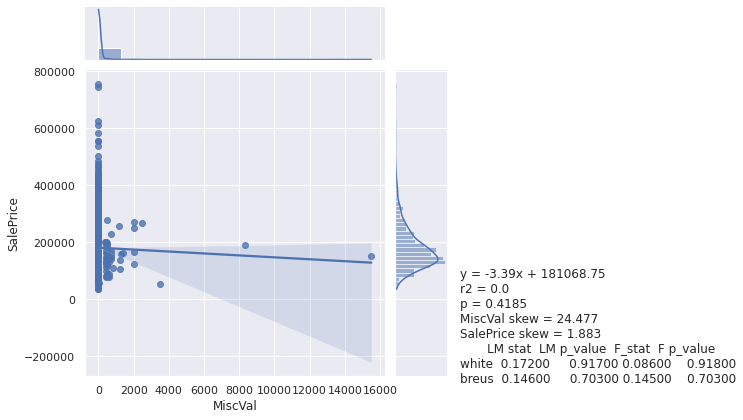

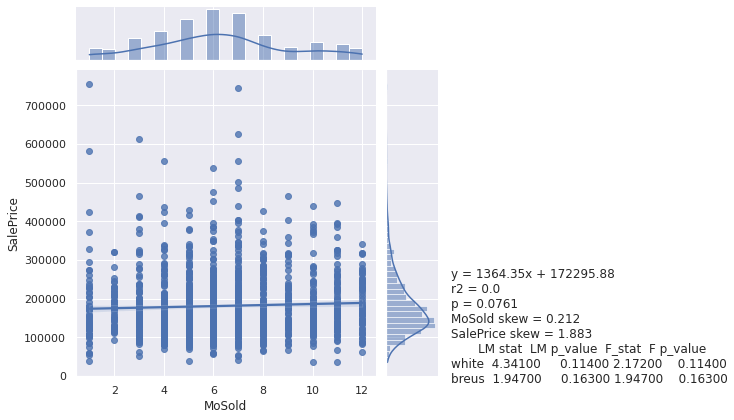

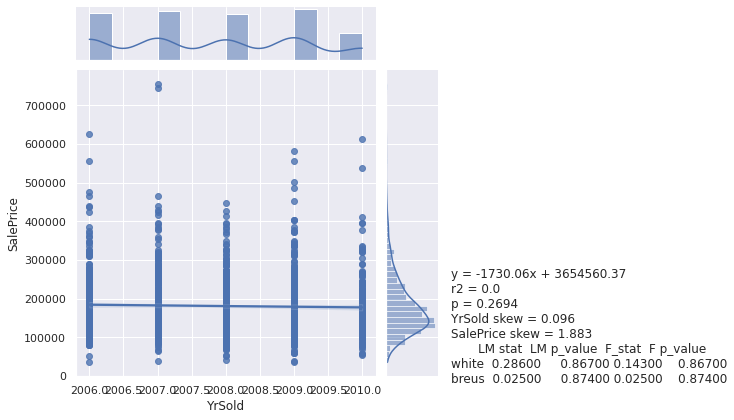

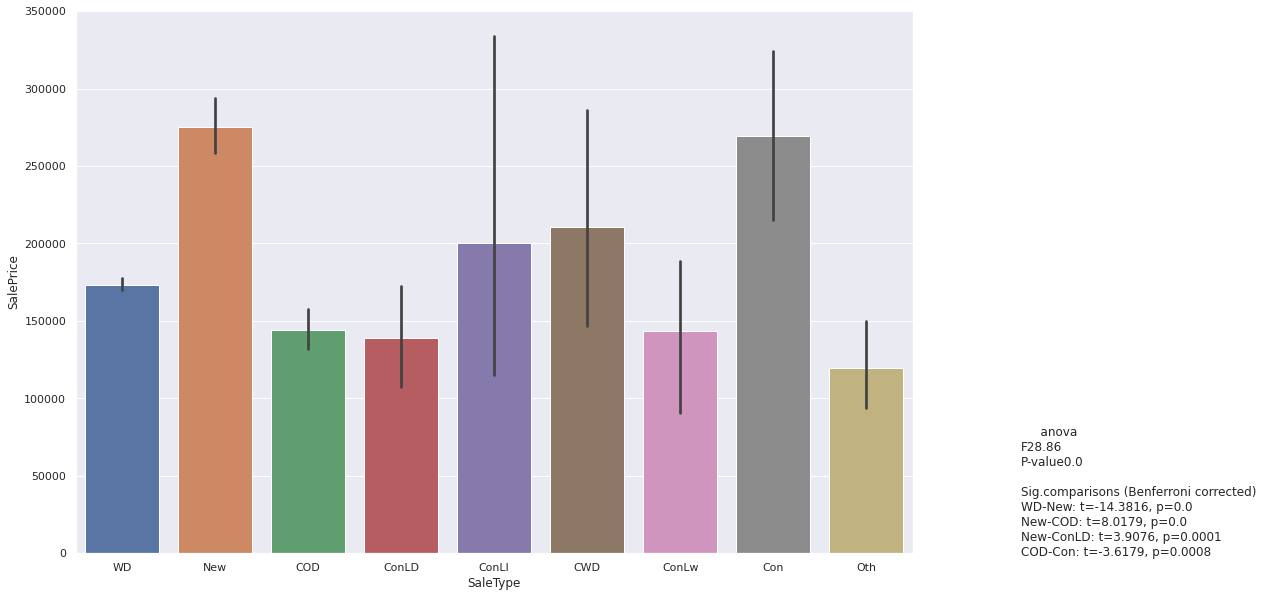

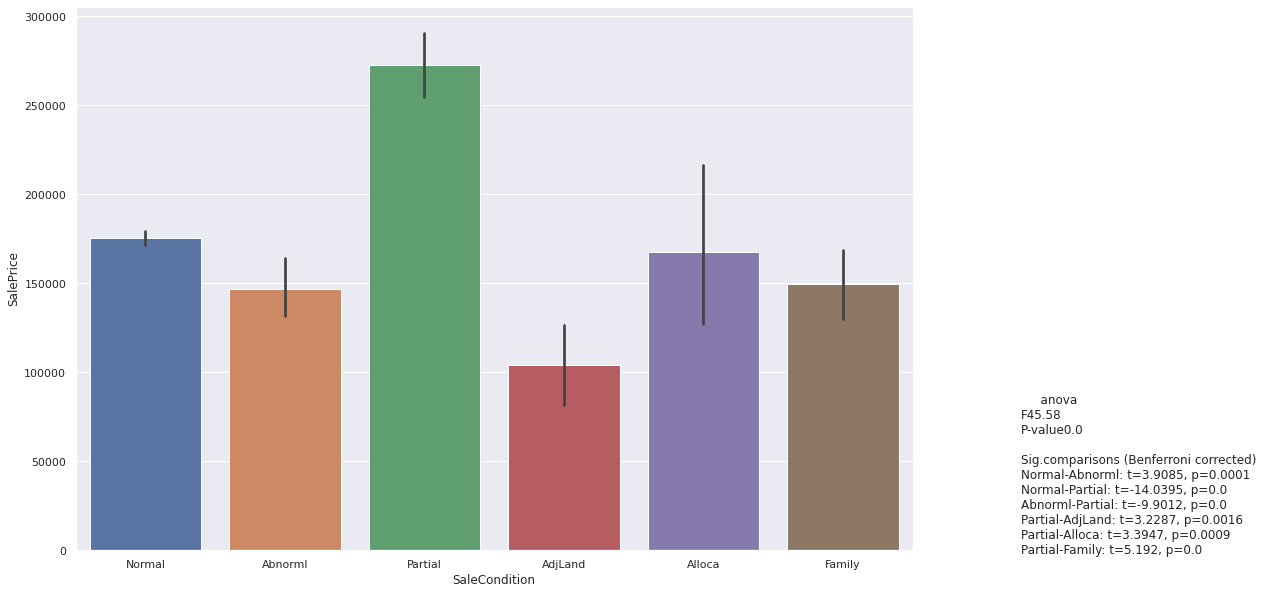

In [105]:
#print the visualizations

for col in df:
    if col != 'SalePrice':
        if pd.api.types.is_numeric_dtype(df[col]):
            scatter(df[col], df.SalePrice)
        else:
            bar_chat(df, col, 'SalePrice')
        

# step 4. MLR

In [106]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
pd.options.display.float_format = '{:.5f}'.format

for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = df.join(pd.get_dummies(df[col], prefix = col, drop_first=True))
df = df.select_dtypes(np.number)        
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns) #scale the features to between 0 and 1

label = 'SalePrice'
y = df[label]
X = df.drop(columns=[label]).assign(const=1)
results = sm.OLS(y, X).fit()
df_results = pd.DataFrame({'coef': results.params, 't': abs(results.tvalues), 'p': results.pvalues})
print(df_results.sort_values(by=['t', 'p']))


                           coef        t       p
Functional_Maj2        -0.00008  0.00404 0.99678
BsmtCond_Gd            -0.00009  0.01198 0.99044
Exterior1st_Stone      -0.00073  0.02169 0.98270
Neighborhood_Veenker    0.00037  0.02582 0.97941
Electrical_FuseF       -0.00026  0.03276 0.97387
OpenPorchSF             0.00032  0.03635 0.97101
Condition2_RRNn        -0.00169  0.04509 0.96404
SaleCondition_Partial  -0.00094  0.04584 0.96345
Neighborhood_Blueste   -0.00136  0.05186 0.95865
SaleType_WD            -0.00030  0.05265 0.95802
BsmtFinType1_Rec       -0.00025  0.06130 0.95113
CentralAir_Y           -0.00040  0.07449 0.94063
HeatingQC_Po            0.00284  0.07732 0.93838
Heating_Grav            0.00311  0.08021 0.93608
SaleCondition_Family    0.00071  0.08407 0.93301
PavedDrive_Y            0.00042  0.08810 0.92981
SaleType_ConLw          0.00179  0.10677 0.91499
HouseStyle_SFoyer       0.00111  0.12840 0.89785
BsmtHalfBath           -0.00130  0.15546 0.87648
FireplaceQu_Fa      

We can't use all the features in predicting the SalePrice since it's evident that some of the columns aren't statistically significant. 
We need to create functions to help track what happens after we drop the least significant column so we can have a chance to select maybe 20 features that  we're sure have a strong effect on SalePrice,and then use those features for machine learning.

In [107]:
def mlr_prepare(df): #generate dummy features, perform scaling
        import numpy as np
        import pandas as pd
        from sklearn.preprocessing import MinMaxScaler
        
        for col in df:
            if not pd.api.types.is_numeric_dtype(df[col]):
                df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
        
        df = df.select_dtypes(np.number)
        scaler = MinMaxScaler()
        df_minmax = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        return df_minmax
    

In [108]:
def mlr(df, label): #run the actual MLR
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    
    y = df[label]
    X = df.drop(columns=[label]).assign(const=1)
    results = sm.OLS(y, X).fit()
    return results
                
results = mlr(df, 'SalePrice')


In [109]:
def mlr_feature_df(results): #dataframe to help us view and sort results by t and p
    
    df_features = pd.DataFrame({'coef': results.params, 't': abs(results.tvalues), 'p': results.pvalues})
    df_features.drop(labels=['const'], inplace=True)
    df_features = df_features.sort_values(by=['t', 'p'])
    return df_features

mlr_feature_df(results)

coef        t       p
Functional_Maj2        -0.00008  0.00404 0.99678
BsmtCond_Gd            -0.00009  0.01198 0.99044
Exterior1st_Stone      -0.00073  0.02169 0.98270
Neighborhood_Veenker    0.00037  0.02582 0.97941
Electrical_FuseF       -0.00026  0.03276 0.97387
OpenPorchSF             0.00032  0.03635 0.97101
Condition2_RRNn        -0.00169  0.04509 0.96404
SaleCondition_Partial  -0.00094  0.04584 0.96345
Neighborhood_Blueste   -0.00136  0.05186 0.95865
SaleType_WD            -0.00030  0.05265 0.95802
BsmtFinType1_Rec       -0.00025  0.06130 0.95113
CentralAir_Y           -0.00040  0.07449 0.94063
HeatingQC_Po            0.00284  0.07732 0.93838
Heating_Grav            0.00311  0.08021 0.93608
SaleCondition_Family    0.00071  0.08407 0.93301
PavedDrive_Y            0.00042  0.08810 0.92981
SaleType_ConLw          0.00179  0.10677 0.91499
HouseStyle_SFoyer       0.00111  0.12840 0.89785
BsmtHalfBath           -0.00130  0.15546 0.87648
FireplaceQu_Fa         -0.00155  0.16269 0.87079
ExterCond_Fa           -0.00434  0.17460 0.86142
Condition1_RRNe        -0.00439  0.18145 0.85605
GarageFinish_Unf       -0.00061  0.18233 0.85535
HeatingQC_Fa            0.00118  0.18288 0.85492
Functional_Mod         -0.00272  0.18932 0.84987
EnclosedPorch           0.00196  0.20707 0.83599
ExterCond_Po            0.00911  0.21077 0.83311
Exterior1st_BrkComm    -0.00819  0.21414 0.83047
Neighborhood_BrDale    -0.00338  0.22374 0.82300
Neighborhood_Somerst   -0.00302  0.24274 0.80825
ExterCond_TA           -0.00687  0.28945 0.77229
Condition2_Feedr       -0.00974  0.30198 0.76272
SaleType_ConLI          0.00492  0.30853 0.75773
Heating_GasW            0.01144  0.31399 0.75359
MiscVal                 0.00954  0.31436 0.75330
SaleCondition_Alloca    0.00388  0.31973 0.74922
Heating_OthW           -0.01425  0.32903 0.74219
Exterior2nd_Brk Cmn     0.00984  0.35454 0.72300
BsmtFinType2_GLQ       -0.00472  0.36642 0.71412
BldgType_2fmCon        -0.00635  0.36945 0.71186
Exterior2nd_BrkFace     0.00696  0.38196 0.70256
Condition2_Norm        -0.01139  0.40687 0.68417
Heating_GasA            0.01495  0.42280 0.67252
Exterior1st_MetalSd    -0.00864  0.42889 0.66808
Electrical_FuseP       -0.01099  0.43001 0.66726
HouseStyle_SLvl         0.00333  0.43697 0.66221
Exterior2nd_MetalSd     0.00875  0.44606 0.65563
PavedDrive_P           -0.00345  0.45042 0.65249
BsmtExposure_Missing_B -0.01452  0.45596 0.64850
FireplaceQu_Gd          0.00341  0.46430 0.64251
ExterCond_Gd           -0.01152  0.48433 0.62824
Neighborhood_SawyerW   -0.00522  0.48591 0.62712
RoofStyle_Hip           0.01246  0.48722 0.62619
RoofStyle_Gable         0.01268  0.49756 0.61889
Exterior1st_BrkFace     0.00904  0.51454 0.60697
MSSubClass             -0.01006  0.51952 0.60349
Electrical_SBrkr       -0.00213  0.52259 0.60136
Exterior2nd_Stucco      0.01000  0.53395 0.59347
Exterior2nd_AsphShn     0.01655  0.54033 0.58907
GarageYrBlt            -0.00629  0.55694 0.57767
Exterior2nd_Stone      -0.01341  0.56720 0.57069
LotShape_IR3            0.00698  0.57007 0.56873
Exterior2nd_CBlock     -0.01073  0.57229 0.56723
Exterior1st_CBlock     -0.01073  0.57229 0.56723
Exterior2nd_Wd Shng     0.00988  0.57635 0.56449
BsmtCond_TA             0.00346  0.59151 0.55429
RoofStyle_Gambrel       0.01655  0.59535 0.55172
LotConfig_Inside       -0.00147  0.59654 0.55093
Exterior2nd_Other      -0.02256  0.60203 0.54727
Neighborhood_BrkSide   -0.00787  0.60546 0.54498
Exterior2nd_Plywood     0.01033  0.62064 0.53496
Exterior1st_Stucco     -0.01209  0.62188 0.53414
ExterQual_Fa           -0.00947  0.62719 0.53065
SaleType_Oth            0.01310  0.65878 0.51016
FireplaceQu_TA          0.00506  0.66226 0.50793
SaleCondition_AdjLand   0.01338  0.66800 0.50426
Condition2_RRAn        -0.02914  0.66930 0.50343
Condition1_RRNn         0.01205  0.68130 0.49581
Neighborhood_MeadowV   -0.01064  0.69135 0.48948
Exterior1st_CemntBd    -0.01830  0.69691 0.48599
BsmtFullBath            0.00588  0.71806 0.47286
Exterior2

In [110]:
#function to calculate fit statistics
def mlr_fit(results, actual, roundto=10):
    
    df_features = mlr_feature_df(results) #generate feature table for sorting through t and p
    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum((residuals**2))/len(actual))
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    fit_stats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto),
                 round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto),
                 round(mae, roundto), [df_features.index.values]]
    return fit_stats

In [111]:
#control mlr and mlr_fit by a certain criterion of features at a time
def mlr_step(df, label, min=2):
    #create the empty model results table
    df_models = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'RMSE', 'MAE', 'features'])
    
    #prepare the data by generating dummies and scaling
    df = mlr_prepare(df)
    
    #run the first model with all the features
    results = mlr(df, label)
    
    #generate the fit statistics for the model
    df_models.loc[str(len(results.params))] = mlr_fit(results, df[label], 10)
    
    #generate feature table that allows sorting labels
    df_features = mlr_feature_df(results)
    
    #step through a series of reduces models
    while len(results.params) >= min:
        df = df.drop(columns=[df_features.index[0]])
        results = mlr(df, label)
        df_features = mlr_feature_df(results)
        df_models.loc[len(results.params)] = mlr_fit(results, df[label], 10)
        
    #save the full models table to csv
    df_models.to_csv('housing_data.csv')
    
    #return to display a shortened version without features list
    #df_models.drop(columns=['features'], inplace=True)
    
    return df_models
    

In [112]:

df_models = mlr_step(df, 'SalePrice')
df_models_copy = df_models.copy()
df_models_copy.drop(columns=['features'], inplace=True)
df_models_copy

R2     R2a    diff    RMSE     MAE
250 0.93276 0.91946 0.01330 0.02860 0.01842
249 0.93276 0.91953 0.01324 0.02860 0.01842
248 0.93276 0.91959 0.01317 0.02860 0.01842
247 0.93276 0.91966 0.01311 0.02860 0.01842
246 0.93276 0.91972 0.01304 0.02860 0.01842
245 0.93276 0.91979 0.01297 0.02860 0.01842
244 0.93276 0.91986 0.01291 0.02860 0.01842
243 0.93276 0.91992 0.01284 0.02860 0.01842
242 0.93276 0.91999 0.01278 0.02860 0.01842
241 0.93276 0.92005 0.01271 0.02860 0.01842
240 0.93276 0.92012 0.01265 0.02860 0.01842
239 0.93276 0.92018 0.01258 0.02860 0.01842
238 0.93276 0.92025 0.01252 0.02860 0.01842
237 0.93276 0.92031 0.01245 0.02860 0.01842
236 0.93276 0.92037 0.01239 0.02860 0.01842
235 0.93276 0.92044 0.01232 0.02860 0.01843
234 0.93276 0.92050 0.01226 0.02860 0.01843
233 0.93276 0.92057 0.01220 0.02860 0.01842
232 0.93276 0.92063 0.01213 0.02860 0.01843
231 0.93276 0.92069 0.01207 0.02860 0.01843
230 0.93276 0.92075 0.01200 0.02860 0.01843
229 0.93276 0.92082 0.01194 0.02860 0.01843
228 0.93275 0.92088 0.01188 0.02860 0.01843
227 0.93275 0.92094 0.01181 0.02860 0.01843
226 0.93275 0.92100 0.01175 0.02860 0.01843
225 0.93275 0.92106 0.01169 0.02860 0.01844
224 0.93274 0.92112 0.01162 0.02860 0.01845
223 0.93274 0.92118 0.01156 0.02860 0.01844
222 0.93274 0.92124 0.01150 0.02860 0.01845
221 0.93273 0.92130 0.01144 0.02860 0.01845
220 0.93273 0.92136 0.01137 0.02860 0.01845
219 0.93273 0.92142 0.01131 0.02860 0.01845
218 0.93272 0.92148 0.01125 0.02860 0.01846
217 0.93272 0.92154 0.01119 0.02861 0.01845
216 0.93272 0.92159 0.01112 0.02861 0.01846
215 0.93271 0.92165 0.01106 0.02861 0.01846
214 0.93271 0.92171 0.01100 0.02861 0.01846
213 0.93270 0.92176 0.01094 0.02861 0.01845
212 0.93270 0.92182 0.01088 0.02861 0.01846
211 0.93269 0.92187 0.01082 0.02861 0.01846
210 0.93269 0.92193 0.01076 0.02861 0.01846
209 0.93268 0.92199 0.01069 0.02861 0.01846
208 0.93268 0.92204 0.01063 0.02862 0.01847
207 0.93267 0.92210 0.01057 0.02862 0.01847
206 0.93266 0.92215 0.01051 0.02862 0.01846
205 0.93266 0.92221 0.01045 0.02862 0.01846
204 0.93265 0.92226 0.01039 0.02862 0.01846
203 0.93264 0.92231 0.01033 0.02862 0.01846
202 0.93264 0.92237 0.01027 0.02862 0.01846
201 0.93263 0.92242 0.01021 0.02863 0.01846
200 0.93263 0.92248 0.01015 0.02863 0.01846
199 0.93262 0.92253 0.01009 0.02863 0.01847
198 0.93261 0.92258 0.01003 0.02863 0.01847
197 0.93260 0.92263 0.00997 0.02863 0.01849
196 0.93258 0.92267 0.00991 0.02863 0.01849
195 0.93257 0.92272 0.00985 0.02864 0.01848
194 0.93256 0.92277 0.00979 0.02864 0.01848
193 0.93255 0.92281 0.00973 0.02864 0.01849
192 0.93253 0.92286 0.00968 0.02865 0.01850
191 0.93252 0.92290 0.00962 0.02865 0.01850
190 0.93250 0.92294 0.00956 0.02865 0.01851
189 0.93249 0.92299 0.00950 0.02865 0.01852
188 0.93248 0.92303 0.00944 0.02866 0.01852
187 0.93248 0.92303 0.00944 0.02866 0.01852
186 0.93246 0.92307 0.00939 0.02866 0.01853
185 0.93244 0.92312 0.00933 0.02866 0.01854
184 0.93242 0.92315 0.00927 0.02867 0.01855
183 0.93240 0.92319 0.00921 0.02867 0.01856
182 0.93238 0.92323 0.00916 0.02868 0.01857
181 0.93236 0.92326 0.00910 0.02868 0.01857
180 0.93234 0.92330 0.00904 0.02869 0.01856
179 0.93232 0.92333 0.00899 0.02869 0.01856
178 0.93229 0.92336 0.00893 0.02870 0.01855
177 0.93227 0.92339 0.00887 0.02870 0.01856
176 0.93224 0.92342 0.00882 0.02871 0.01857
175 0.93221 0.92345 0.00876 0.02871 0.01859
174 0.93218 0.92347 0.00871 0.02872 0.01859
173 0.93215 0.92350 0.00865 0.02873 0.01859
172 0.93212 0.92352 0.00860 0.02873 0.01861
171 0.93208 0.92354 0.00854 0.02874 0.01861
170 0.93205 0.92356 0.00849 0.02875 0.01862
169 0.93201 0.92358 0.00843 0.02876 0.01864
168 0.93201 0.92358 0.00843 0.02876 0.01864
167 0.93201 0.92358 0.00843 0.02876 0.01864
166 0.93197 0.92359 0.00838 0.02876 0.01864
165 0.93196 0.92364 0.00832 0.02877 0.01866
164 0.93192 0.92365 0.00827 0.02878 0.01868
163 0.93188 0.92367 0.00821 0.02878 0.01866
162 0.93188 0.92367 0.00821 0.02878 0.01866
161 0.93184 0.92368 0.00816 0.02879 0.01867
160 0

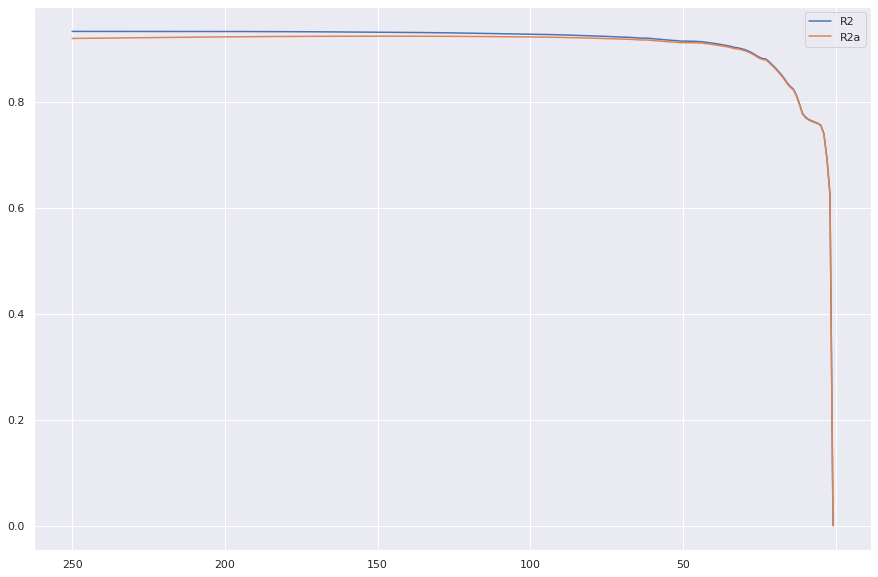

In [113]:
import matplotlib.pyplot as plt

df_models_copy.R2.plot.line()
df_models_copy.R2a.plot.line()
plt.legend()
plt.show()

We can't use all the features when developing machine learning models since most of the features don't have such as significant effect on SalePrice. Using all the features would lead to overfitting. As seen in the graph above, the rsquared and rsquared adjusted get really close below 50 features. But let's with 20 features and see how our models will perform. We will, of course, add more features and see if the models improve.

# Step 5. Machine learning models

In [158]:
#select the 20 most significant features from the previous analysis
features = ['GarageCond_Po', 'GarageCond_Fa', 'GarageQual_Po', 'GarageQual_Gd',
       'GarageCond_TA', 'GarageQual_TA', 'GarageQual_Fa', 'BedroomAbvGr',
       'LandSlope_Sev', 'PoolQC_Fa', 'MSZoning_FV', 'Exterior1st_BrkFace',
       'SaleCondition_Normal', 'BsmtExposure_No', 'Street_Pave',
       'Condition1_Norm', 'KitchenAbvGr', 'KitchenQual_Fa',
       'Functional_Typ', 'BsmtQual_TA', 'ExterQual_Gd', 'ExterQual_TA',
       'PoolArea', 'GarageArea', 'BsmtQual_Gd', 'TotalBsmtSF',
       'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'MSSubClass', 'SaleType_New', 'LotArea', 'KitchenQual_TA',
       'Neighborhood_StoneBr', 'KitchenQual_Gd', 'OverallCond',
       'Neighborhood_NoRidge', 'OverallQual', 'BsmtFinSF1', 'YearBuilt',
       'Condition2_PosN', 'one_1stFlrSF', 'RoofMatl_Roll',
       'RoofMatl_Metal', 'RoofMatl_Membran', 'RoofMatl_WdShake',
       'RoofMatl_Tar&Grv', 'RoofMatl_CompShg', 'RoofMatl_WdShngl',
       'two_2ndFlrSF']

We need to go back to before encoded the categorical features and scaled.

In [159]:
#change the names of columns that contain digits
for col in df_copy:
    if col[0].isdigit():
        numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
        df_copy.rename(columns = {col:numbers[int(col[0])] + '_' + col}, inplace=True)

# impute the categorical columns
for col in df_copy:
            if not pd.api.types.is_numeric_dtype(df_copy[col]):
                df_copy = df_copy.join(pd.get_dummies(df_copy[col], prefix=col, drop_first=True))
df_copy = df_copy.select_dtypes(np.number)


In [160]:
#select the 20 most significant columns based on the earlier analysis
training_df = df_copy[features]
training_df.head(5)

GarageCond_Po  GarageCond_Fa  GarageQual_Po  GarageQual_Gd  GarageCond_TA  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   GarageQual_TA  GarageQual_Fa  BedroomAbvGr  LandSlope_Sev  PoolQC_Fa  ...  \
0              1              0             3              0          0  ...   
1              1              0             3              0          0  ...   
2              1              0             3              0          0  ...   
3              1              0             3              0          0  ...   
4              1              0             4              0          0  ...   

   Condition2_PosN  one_1stFlrSF  RoofMatl_Roll  RoofMatl_Metal  \
0                0           856              0               0   
1                0          1262              0               0   
2                0           920              0               0   
3                0           961              0               0   
4                0          1145              0               0   

   RoofMatl_Membran  RoofMatl_WdShake  RoofMatl_Tar&Grv  RoofMatl_CompShg  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   RoofMatl_WdShngl  two_2ndFlrSF  
0                 0           854  
1                 0             0  
2                 0           866  
3                 0           756  
4                 0          1053  

[5 rows x 50 columns]

In [161]:
#get the features and labels
y = df_copy['SalePrice'].values
X = training_df.values


#import the different models
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline

#ignore warnings to make the results more clear
import warnings
warnings.filterwarnings('ignore') 

#split to training and test data and add scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)

#obtain the models and set base parameters
linear_reg = LinearRegression()
svr = LinearSVR()
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.001)
decision_tree = DecisionTreeRegressor()
randomforest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
gradientboosting = GradientBoostingRegressor()
bagging = BaggingRegressor()

models = [linear_reg, svr, ridge, lasso, decision_tree, randomforest, adaboost, gradientboosting, bagging]

for model in models:
    steps = [('scaler', MinMaxScaler()), ('model', model)]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    score = mean_absolute_error(y_pred, y_val)
    print(f'{model} : {score}')

LinearRegression() : 18411.17418076585
LinearSVR() : 165772.85574189774
Ridge(alpha=0.001) : 18410.167891782556
Lasso(alpha=0.001) : 18337.12444392786
DecisionTreeRegressor() : 28397.461187214612
RandomForestRegressor() : 18767.71570776256
AdaBoostRegressor() : 25327.795118930502
GradientBoostingRegressor() : 17947.73956855752
BaggingRegressor() : 20155.283561643835


 RandomForestRegressor has the least MAE

# Step 6: Fitting the model to the test dataframe

In [118]:
# import test dataframe
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH     80.00000    11622   Pave   NaN      Reg   
1  1462          20       RL     81.00000    14267   Pave   NaN      IR1   
2  1463          60       RL     74.00000    13830   Pave   NaN      IR1   
3  1464          60       RL     78.00000     9978   Pave   NaN      IR1   
4  1465         120       RL     43.00000     5005   Pave   NaN      IR1   
5  1466          60       RL     75.00000    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL     63.00000     8402   Pave   NaN      IR1   
8  1469          20       RL     85.00000    10176   Pave   NaN      Reg   
9  1470          20       RL     70.00000     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

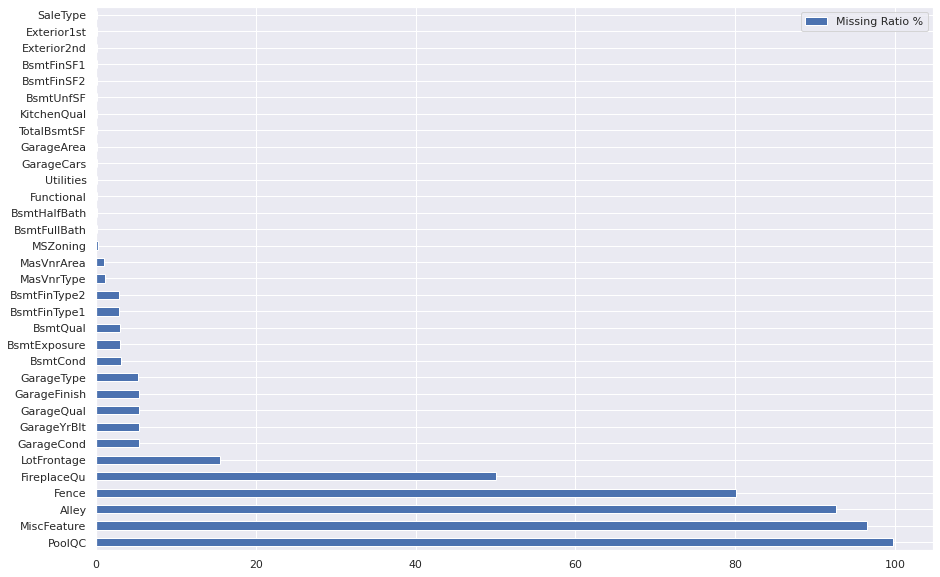

In [119]:
#dealing with missing values.
#we have to follow the same steps we used in the training dataset
test_df.isna().sum().sort_values(ascending=False)
plot_nas(test_df)

In [120]:
# poolQC
test_df.PoolQC.fillna("NA", inplace=True)

#MiscFeature
test_df.drop(columns="MiscFeature", inplace = True)

#alley
test_df.drop(columns="Alley", inplace=True)

#fence
test_df.drop(columns="Fence", inplace=True)

#FireplaceQu
missing_values(test_df, "FireplaceQu", "Fireplaces")

#LotFrontage
test_df.LotFrontage.fillna(test_df.LotFrontage.median(), inplace=True)

#garage columns except garageyrblt
garage(test_df)

#garageyrblt
test_df["GarageYrBlt"].fillna(test_df["YearBuilt"], inplace=True)

#basement columns
basement(test_df)

#'MasVnrType' and 'MsVnrArea'
#fill the category column with the most modal class
test_df.MasVnrType.fillna(test_df.MasVnrType.mode()[0], inplace=True)
#fill the Area column with the most median
test_df.MasVnrArea.fillna(test_df.MasVnrArea.median(), inplace=True)

#electrical column
#fill with modal class
test_df.Electrical.fillna(test_df.Electrical.mode()[0], inplace=True)


Associated column zero recordings: 730,  missing values: 730
unique values:  ['NA' 'TA' 'Gd' 'Po' 'Fa' 'Ex']
     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
53          NaN          NaN          NaN        NaN        NaN
71          NaN          NaN          NaN        NaN        NaN
79          NaN          NaN          NaN        NaN        NaN
92          NaN          NaN          NaN        NaN        NaN
96          NaN          NaN          NaN        NaN        NaN
98          NaN          NaN          NaN        NaN        NaN
100         NaN          NaN          NaN        NaN        NaN
130         NaN          NaN          NaN        NaN        NaN
133         NaN          NaN          NaN        NaN        NaN
134         NaN          NaN          NaN        NaN        NaN
154         NaN          NaN          NaN        NaN        NaN
155         NaN          NaN          NaN        NaN        NaN
257         NaN          NaN          NaN        NaN       

The above results are from the functions we defined earlier when filling nas in the training df. I didn't find necessary to edit the functions to prevent the above results from being printed out. After all we understand what we've done. 
However, we still have other columns to fill nas. That has been done below.

In [121]:
#fill nas in the categorical columns with the mode. Remember to first check what each column represents

cat_cols = ["MSZoning", "BsmtFullBath", "Utilities", "BsmtHalfBath", "Functional", "Exterior2nd", "KitchenQual", "SaleType", "Exterior1st"]
for col in cat_cols:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)


#Basement numerical columns and GarageArea. Fill with median
b_cols = ["TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in b_cols:
    test_df[col].fillna(test_df[col].median(), inplace=True)

#GarageCars
test_df.GarageCars.fillna(test_df.GarageCars.mode()[0], inplace=True) #fill nas with the mode

In [122]:
#change the columns starting with digits to resemble those in the training df.
for col in test_df:
    if col[0].isdigit():
        numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
        df.rename(columns = {col:numbers[int(col[0])] + '_' + col}, inplace=True)

In [123]:
#Impute categorical columns and scale them
from sklearn.preprocessing import MinMaxScaler

for col in test_df:
        if not pd.api.types.is_numeric_dtype(test_df[col]):
            test_df = test_df.join(pd.get_dummies(test_df[col], prefix=col))
                
test_df = test_df.select_dtypes(np.number)
scaler = MinMaxScaler()
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)
      

test_df.head(5)    

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0 0.00000     0.00000      0.32961  0.18415      0.44444      0.62500   
1 0.00069     0.00000      0.33520  0.23212      0.55556      0.62500   
2 0.00137     0.23529      0.29609  0.22420      0.44444      0.50000   
3 0.00206     0.23529      0.31844  0.15433      0.55556      0.62500   
4 0.00274     0.58824      0.12291  0.06412      0.77778      0.50000   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0    0.62595       0.18333     0.00000     0.11671  ...         0.00000   
1    0.60305       0.13333     0.08372     0.23017  ...         0.00000   
2    0.90076       0.80000     0.00000     0.19726  ...         0.00000   
3    0.90840       0.80000     0.01550     0.15012  ...         0.00000   
4    0.86260       0.70000     0.00000     0.06559  ...         0.00000   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0       0.00000       0.00000      1.00000                0.00000   
1       0.00000       0.00000      1.00000                0.00000   
2       0.00000       0.00000      1.00000                0.00000   
3       0.00000       0.00000      1.00000                0.00000   
4       0.00000       0.00000      1.00000                0.00000   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                0.00000               0.00000               0.00000   
1                0.00000               0.00000               0.00000   
2                0.00000               0.00000               0.00000   
3                0.00000               0.00000               0.00000   
4                0.00000               0.00000               0.00000   

   SaleCondition_Normal  SaleCondition_Partial  
0               1.00000                0.00000  
1               1.00000                0.00000  
2               1.00000                0.00000  
3               1.00000                0.00000  
4               1.00000                0.00000  

[5 rows x 273 columns]

# Step 7: Fit the RandomForest model to the test_df

In [162]:
#select the 20 most significant features from the previous analysis
features = ['GarageCond_Po', 'GarageCond_Fa', 'GarageQual_Po', 'GarageQual_Gd',
       'GarageCond_TA', 'GarageQual_TA', 'GarageQual_Fa', 'BedroomAbvGr',
       'LandSlope_Sev', 'PoolQC_Fa', 'MSZoning_FV', 'Exterior1st_BrkFace',
       'SaleCondition_Normal', 'BsmtExposure_No', 'Street_Pave',
       'Condition1_Norm', 'KitchenAbvGr', 'KitchenQual_Fa',
       'Functional_Typ', 'BsmtQual_TA', 'ExterQual_Gd', 'ExterQual_TA',
       'PoolArea', 'GarageArea', 'BsmtQual_Gd', 'TotalBsmtSF',
       'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'MSSubClass', 'SaleType_New', 'LotArea', 'KitchenQual_TA',
       'Neighborhood_StoneBr', 'KitchenQual_Gd', 'OverallCond',
       'Neighborhood_NoRidge', 'OverallQual', 'BsmtFinSF1', 'YearBuilt',
       'Condition2_PosN', 'one_1stFlrSF', 'RoofMatl_Roll',
       'RoofMatl_Metal', 'RoofMatl_Membran', 'RoofMatl_WdShake',
       'RoofMatl_Tar&Grv', 'RoofMatl_CompShg', 'RoofMatl_WdShngl',
       'two_2ndFlrSF']
present_features = []
for feature in features:
    if feature in test_df:
        present_features.append(feature)
        
X_test = test_df[present_features].values
X_train = df_copy[present_features].values
y_train = df_copy['SalePrice'].values

steps = [('scaler', MinMaxScaler()), ('model', gradientboosting)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred

array([48526.32130729, 53482.29691868, 48222.42428734, ...,
       41781.15876148, 46922.02733994, 48222.42428734])

In [163]:
testing = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
testing['SalePrice'] = y_pred.tolist()
sample_submission = testing[['Id', 'SalePrice']]
sample_submission.to_csv('submission.csv')

In [ ]:
pd.read_c